**CSI 4106 Introduction to Artificial Intelligence** <br/>
*Assignment 3: Neural Networks*

# Identification

Name: Ken Chan Thim <br/>
Student Number: 300208086

Name: <br/>
Student Number:

In [1]:
# Code cell


## 1. Analyse exploratoire

### Chargement de l'ensemble de données

Un ensemble de données a été créé pour ce devoir. Il est disponible sur un dépôt GitHub public :

- [github.com/turcotte/csi4106-f24/tree/main/assignments-data/a3](https://github.com/turcotte/csi4106-f24/tree/main/assignments-data/a3)

Vous devez accéder à l'ensemble de données et le lire directement à partir de ce dépôt GitHub dans votre notebook Jupyter.

Utilisez cette cellule de code pour vos directives `import` et autres initialisations.

In [2]:
# Code cell
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

tf.random.set_seed(42)

2024-11-10 20:20:45.456721: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-10 20:20:45.564686: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-10 20:20:45.654684: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731288045.729516    2642 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731288045.753523    2642 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-10 20:20:45.932881: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

1. **Charger l'ensemble de données** :

    - Écrivez du code pour charger les trois ensembles de données.


In [3]:
# Code cell
df_train = pd.read_csv("https://raw.githubusercontent.com/turcotte/csi4106-f24/refs/heads/main/assignments-data/a3/cb513_train.csv", header=None)
df_test = pd.read_csv("https://raw.githubusercontent.com/turcotte/csi4106-f24/refs/heads/main/assignments-data/a3/cb513_test.csv", header=None)
df_valid = pd.read_csv("https://raw.githubusercontent.com/turcotte/csi4106-f24/refs/heads/main/assignments-data/a3/cb513_valid.csv", header=None)

df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,453,454,455,456,457,458,459,460,461,462
0,2,0.0000,0.0556,0.0000,0.0556,0.1111,0.0000,0.0556,0.0000,0.0000,...,0.1667,0.2222,0.0000,0.0000,0.1667,0.0000,0.0,0.0000,0.000,0.0
1,2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.000,0.0
2,2,0.1905,0.0000,0.3333,0.0000,0.0000,0.0000,0.0000,0.0000,0.2857,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.1905,0.381,0.0
3,2,0.0225,0.0000,0.0112,0.1348,0.0000,0.0112,0.1348,0.0112,0.1685,...,0.0000,0.0787,0.0674,0.0112,0.0225,0.1573,0.0,0.0225,0.000,0.0
4,2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.6667,0.0000,0.0000,0.0,0.0000,0.000,0.0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58291 entries, 0 to 58290
Columns: 463 entries, 0 to 462
dtypes: float64(462), int64(1)
memory usage: 205.9 MB


In [5]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,453,454,455,456,457,458,459,460,461,462
count,58291.000000,58291.000000,58291.000000,58291.000000,58291.000000,58291.000000,58291.000000,58291.000000,58291.000000,58291.000000,...,58291.000000,58291.000000,58291.000000,58291.000000,58291.000000,58291.000000,58291.000000,58291.000000,58291.000000,58291.000000
mean,1.040349,0.081129,0.015958,0.056881,0.058845,0.039120,0.075578,0.022290,0.055313,0.054573,...,0.043422,0.034924,0.045785,0.059653,0.055848,0.067431,0.014030,0.034971,0.034169,0.000491
std,0.883748,0.170770,0.095076,0.154762,0.146985,0.133049,0.201984,0.096272,0.141717,0.135915,...,0.148612,0.105381,0.134625,0.142328,0.142496,0.156227,0.088168,0.126633,0.114237,0.013854
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.083300,0.000000,0.033300,0.047600,0.000000,0.031200,0.000000,0.037000,0.047600,...,0.000000,0.024400,0.025600,0.055650,0.047600,0.055600,0.000000,0.000000,0.000000,0.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988800,0.500000


### Prétraitement des données

2. **Brasser les lignes** :

    - Étant donné que les exemples sont générés en faisant glisser une fenêtre sur chaque séquence de protéines, la plupart des exemples adjacents proviennent de la même protéine et partagent 20 positions. Pour atténuer l'impact potentiel négatif sur l'entraînement du modèle, la première étape consiste à brasser (*shuffle*) les **lignes** de la matrice de données.


In [6]:
# Code cell

# https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows
df_train = df_train.sample(frac=1).reset_index(drop=True)
df_test = df_test.sample(frac=1).reset_index(drop=True)
df_valid = df_valid.sample(frac=1).reset_index(drop=True)

print(f"After shuffling: \n{df_train.head()}")

After shuffling: 
   0      1    2       3    4       5       6    7       8    9    ...  \
0    1  0.000  0.0  0.0256  0.0  0.0000  0.0000  0.0  0.0256  0.0  ...   
1    0  0.025  0.0  0.0250  0.0  0.0000  0.0250  0.0  0.0000  0.0  ...   
2    1  0.000  0.0  0.0556  0.0  0.0833  0.0833  0.0  0.0000  0.0  ...   
3    0  0.000  0.0  0.0000  0.0  0.0000  0.0000  0.0  0.0000  0.0  ...   
4    0  0.000  0.0  0.0000  0.0  0.0000  1.0000  0.0  0.0000  0.0  ...   

      453     454     455     456     457     458  459  460     461  462  
0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0  0.0  0.0000  0.0  
1  0.0000  0.0000  0.0000  0.7250  0.2250  0.0250  0.0  0.0  0.0000  0.0  
2  0.1389  0.0833  0.0000  0.1667  0.1389  0.0000  0.0  0.0  0.0278  0.0  
3  0.0000  0.0000  0.0000  0.1667  0.0000  0.1667  0.0  0.0  0.1667  0.0  
4  0.0000  0.0435  0.3913  0.0000  0.0000  0.0000  0.0  0.0  0.0000  0.0  

[5 rows x 463 columns]


3. **Mise à l'échelle des caractéristiques numériques** :

    - Étant donné que les 462 caractéristiques sont des proportions représentées par des valeurs comprises entre 0 et 1, la mise à l'échelle peut ne pas être nécessaire. Dans nos évaluations, l'utilisation de [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) a en fait dégradé les performances du modèle. Dans votre flux de traitement, comparez les effets de ne pas mettre à l'échelle les données par rapport à l'application de [MinMaxScaler](https://scikit-learn.org/1.5/modules/generated/sklearn.preprocessing.MinMaxScaler.html). Par souci de temps, une seule expérience suffira. Il est important de noter que lorsque la mise à l'échelle est appliquée, une méthode uniforme doit être utilisée pour toutes les colonnes, compte tenu de leur nature homogène.

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# apply scaler to features but not target
df_train_scaled = pd.DataFrame(scaler.fit_transform(df_train.iloc[:, 1:]), columns=df_train.columns[1:])
df_test_scaled = pd.DataFrame(scaler.transform(df_test.iloc[:, 1:]), columns=df_test.columns[1:])
df_valid_scaled = pd.DataFrame(scaler.transform(df_valid.iloc[:, 1:]), columns=df_valid.columns[1:])

df_train_scaled.head()

,1,2,3,4,5,6,7,8,9,10,...,453,454,455,456,457,458,459,460,461,462
0,0.000,0.0,0.0256,0.0,0.0000,0.0000,0.0,0.0256,0.0,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.000000,0.0
1,0.025,0.0,0.0250,0.0,0.0000,0.0250,0.0,0.0000,0.0,0.0250,...,0.0000,0.0000,0.0000,0.7250,0.2250,0.0250,0.0,0.0,0.000000,0.0
2,0.000,0.0,0.0556,0.0,0.0833,0.0833,0.0,0.0000,0.0,0.0278,...,0.1389,0.0833,0.0000,0.1667,0.1389,0.0000,0.0,0.0,0.028115,0.0
3,0.000,0.0,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0,1.0000,...,0.0000,0.0000,0.0000,0.1667,0.0000,0.1667,0.0,0.0,0.168588,0.0
4,0.000,0.0,0.0000,0.0,0.0000,1.0000,0.0,0.0000,0.0,0.0000,...,0.0000,0.0435,0.3913,0.0000,0.0000,0.0000,0.0,0.0,0.000000,0.0


> ## FINDINGS 3. Mise à l'échelle des caractéristiques numériques
>
> As we can see from the results in [5. Développement et évaluation des modèles](#développement-et-évaluation-des-modèles), there are minimal differences between using the unscaled data and data that was scaled using MinMaxScaler. This makes sense because of the way MinMaxScaler works because the feature values are already between 0 and 1, and MinMaxScaler works by scaling the feature values between 0 and 1.  
>
> For any subsequent parts, we will use the scaled values

4. **Séparation des cibles et des données** :

    - Dans les fichiers CSV, les cibles et les données sont combinées. Pour préparer nos expériences d'apprentissage automatique, séparez les données d'entraînement $X$ et le vecteur cible $y$ pour chacun des trois ensembles de données.

In [8]:
# Code cell

X_train_scaled, y_train = df_train_scaled, df_train.iloc[:, 0]
X_test_scaled, y_test = df_test_scaled, df_test.iloc[:, 0]
X_valid_scaled, y_valid = df_valid_scaled, df_valid.iloc[:, 0]

X_train_unscaled = df_train.iloc[:, 1:]
X_test_unscaled = df_test.iloc[:, 1:]
X_valid_unscaled = df_valid.iloc[:, 1:]

In [9]:
X_train_scaled.head()

,1,2,3,4,5,6,7,8,9,10,...,453,454,455,456,457,458,459,460,461,462
0,0.000,0.0,0.0256,0.0,0.0000,0.0000,0.0,0.0256,0.0,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.000000,0.0
1,0.025,0.0,0.0250,0.0,0.0000,0.0250,0.0,0.0000,0.0,0.0250,...,0.0000,0.0000,0.0000,0.7250,0.2250,0.0250,0.0,0.0,0.000000,0.0
2,0.000,0.0,0.0556,0.0,0.0833,0.0833,0.0,0.0000,0.0,0.0278,...,0.1389,0.0833,0.0000,0.1667,0.1389,0.0000,0.0,0.0,0.028115,0.0
3,0.000,0.0,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0,1.0000,...,0.0000,0.0000,0.0000,0.1667,0.0000,0.1667,0.0,0.0,0.168588,0.0
4,0.000,0.0,0.0000,0.0,0.0000,1.0000,0.0,0.0000,0.0,0.0000,...,0.0000,0.0435,0.3913,0.0000,0.0000,0.0000,0.0,0.0,0.000000,0.0


In [10]:
y_train.head()

0    1
1    0
2    1
3    0
4    0
Name: 0, dtype: int64

In [11]:
y_train.value_counts()

0
2    23986
0    21634
1    12671
Name: count, dtype: int64

### Développement et évaluation des modèles

5. **Développement de modèle** :

    - **Modèle de base** : Implémentez un modèle utilisant le [DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html). Ce modèle ignore les données d'entrée et prédit la classe majoritaire. Un tel modèle est parfois appelé modèle « homme de paille ».

    - **Modèle de référence** : Comme modèle de référence, sélectionnez un des algorithmes d'apprentissage automatique précédemment étudiés : arbres de décision, k-plus proches voisins (KNN) ou régression logistique. Utilisez les paramètres par défaut fournis par scikit-learn pour entraîner chaque modèle en tant que modèle de référence. Pourquoi avez-vous choisi ce classificateur particulier ? Pourquoi pensez-vous qu'il soit approprié pour cette tâche spécifique ?

    - **Modèle de réseau de neurones** : En utilisant [Keras](https://keras.io) et [TensorFlow](https://www.tensorflow.org), construisez un modèle séquentiel comprenant une couche d'entrée, une couche cachée et une couche de sortie. La couche d'entrée doit comporter 462 nœuds, correspondant aux 462 attributs de chaque exemple. La couche cachée doit comprendre 8 nœuds et utiliser la fonction d'activation par défaut. La couche de sortie doit comporter trois nœuds, correspondant aux trois classes : hélice (0), feuillet (1) et enroulement (2). Appliquez la fonction d'activation softmax à la couche de sortie pour que les sorties soient traitées comme des probabilités, avec leur somme égale à 1 pour chaque exemple d'entraînement.

    Nous avons donc trois modèles : de base, de référence et réseau de neurones.

### Base Model

In [12]:
# Code cell

# Dummy classifier
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train_scaled, y_train)
dummy_clf.score(X_valid_scaled, y_valid)

0.41989472263463357

> ## Reference model
> 
> We reject KNN because of it is slow at prediction time as it calculates distances to all examples. We choose the reference model to be a Logistic Regression because of its speed and simplicity. 

In [ ]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train_unscaled, y_train)
lr_score = lr_clf.score(X_valid_unscaled, y_valid)

lr_clf_scaled = LogisticRegression()
lr_clf_scaled.fit(X_train_scaled, y_train)
lr_scaled_score = lr_clf_scaled.score(X_valid_scaled, y_valid)

print(f"Score without scaling: {lr_score}")
print(f"Score with scaling: {lr_scaled_score}")

Score without scaling: 0.6720205155891483
Score with scaling: 0.6731002834390606


### Neural Network

In [16]:
# Keras and tensorflow
keras_model_scaled = tf.keras.Sequential()

keras_model_scaled.add(tf.keras.layers.Input(shape=(462,)))
keras_model_scaled.add(tf.keras.layers.Dense(8, activation='relu'))
keras_model_scaled.add(tf.keras.layers.Dense(3, activation='softmax'))

keras_model_scaled.summary()

W0000 00:00:1731288079.543748    2642 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │         3,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,731 (14.57 KB)

 Trainable params: 3,731 (14.57 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
keras_model_scaled.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = keras_model_scaled.fit(X_train_scaled, y_train, validation_data=(X_valid_scaled, y_valid), epochs=60)

Epoch 1/40
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 868us/step - accuracy: 0.5912 - loss: 0.8942 - val_accuracy: 0.6784 - val_loss: 0.7658
Epoch 2/40
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 1s 790us/step - accuracy: 0.6887 - loss: 0.7405 - val_accuracy: 0.6785 - val_loss: 0.7621
Epoch 3/40
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 1s 783us/step - accuracy: 0.6927 - loss: 0.7346 - val_accuracy: 0.6804 - val_loss: 0.7602
Epoch 4/40
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 1s 781us/step - accuracy: 0.6947 - loss: 0.7305 - val_accuracy: 0.6807 - val_loss: 0.7581
Epoch 5/40
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 1s 789us/step - accuracy: 0.6968 - loss: 0.7268 - val_accuracy: 0.6804 - val_loss: 0.7562
Epoch 6/40
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 1s 783us/step - accuracy: 0.6971 - loss: 0.7237 - val_accuracy: 0.6816 - val_loss: 0.7548
Epoch 7/40
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 1s 777us/step - accuracy: 0.6992 - loss: 0.7212 - val_accuracy: 0.6823 - val_loss: 0.7535
Epoch 8/40
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 1s 777us/step - accuracy: 0.7009 -

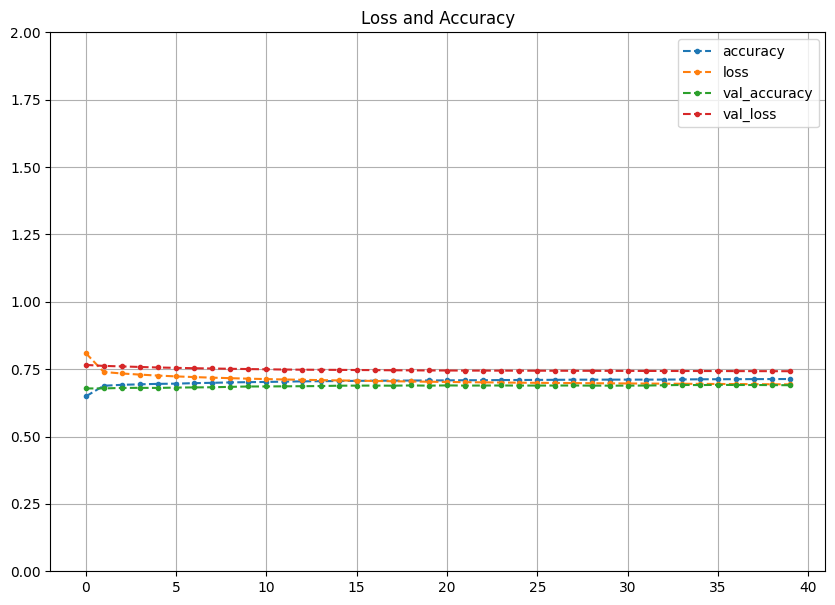

In [18]:
pd.DataFrame(history.history).plot(
    grid=True, figsize=(10, 7), title="Loss and Accuracy", style="--.", ylim=(0, 2)
)
plt.legend(loc="best")
plt.show()

### Other models

In [ ]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train_unscaled, y_train)
dt_score = dt_clf.score(X_valid_unscaled, y_valid)

dt_clf_scaled = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10)
dt_clf_scaled.fit(X_train_scaled, y_train)
dt_scaled_score = dt_clf_scaled.score(X_valid_scaled, y_valid)

print(f"Score without scaling: {dt_score}")
print(f"Score with scaling: {dt_scaled_score}")

Score without scaling: 0.5092455122148738
Score with scaling: 0.5015521662842489


In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_unscaled, y_train)
knn_score = knn_clf.score(X_valid_unscaled, y_valid)

knn_clf_scaled = KNeighborsClassifier()
knn_clf_scaled.fit(X_train_scaled, y_train)
knn_scaled_score = knn_clf_scaled.score(X_valid_scaled, y_valid)

print(f"Score without scaling: {knn_score}")
print(f"Score with scaling: {knn_scaled_score}")

Score without scaling: 0.4289377783776488
Score with scaling: 0.4273181266027804


6. **Évaluation des modèles** :

    - Utilisez la validation croisée pour évaluer les performances du modèle de référence. Sélectionnez un petit nombre de plis (*plis*) pour éviter des temps de calcul excessives.

    - **L'entraînement des réseaux de neurones peut être long.** Par conséquent, leurs performances sont généralement évaluées une seule fois en utilisant un ensemble de validation. Assurez-vous de ne pas utiliser l'ensemble de test avant la fin du devoir.

    - Évaluez les modèles en utilisant des métriques telles que la précision, le rappel et le score F1.

In [19]:
# Code cell
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score

def cross_eval_models(model_dict, X_train_, y_train_):
    model_scores = {}
    metrics = {
            "precision": make_scorer(precision_score, average='weighted', zero_division=0), # was getting a warning UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. 
            "recall": make_scorer(recall_score, average='weighted'),                        # Use `zero_division` parameter to control his behavior. cross evaluation
            "accuracy": make_scorer(accuracy_score),                                        # This was caused by one of the classes never being predicted.
            "f1": make_scorer(f1_score, average='weighted')                                 # Tried using StartifiedKFold to ensure that all classes were represented in each fold but it didn't help
        }                                                                                   # https://stackoverflow.com/questions/43162506/undefinedmetricwarning-f-score-is-ill-defined-and-being-set-to-0-0-in-labels-wi
    strat_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)                # https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.StratifiedKFold.html
    for name, model in model_dict.items():
        print(f"Model: {name}")
        model_scores[name] = {}
        for metric_name, scorer in metrics.items():
            scores = cross_val_score(model, X_train_, y_train_, scoring=scorer, cv=strat_kfold, n_jobs=-1) #https://scikit-learn.org/stable/computing/parallelism.html
            print(f"{metric_name}: {scores}")
            print(f"Mean {metric_name}: {scores.mean():.3f}")
            print(f"StandardDeviation: {scores.std():.3f}")
            model_scores[name][metric_name] = {"scores": scores, "mean": scores.mean(), "std": scores.std()}
        print()
    return model_scores

In [20]:
model_dict = {"dummy": dummy_clf, "dt": dt_clf_scaled, "knn": knn_clf, "lr": lr_clf}
model_scores = cross_eval_models(model_dict, X_train_scaled, y_train)

Model: dummy
precision: [0.16935495 0.1693134  0.1693134  0.1693134  0.1693134 ]
Mean precision: 0.169
StandardDeviation: 0.000
recall: [0.41152758 0.4114771  0.4114771  0.4114771  0.4114771 ]
Mean recall: 0.411
StandardDeviation: 0.000
accuracy: [0.41152758 0.4114771  0.4114771  0.4114771  0.4114771 ]
Mean accuracy: 0.411
StandardDeviation: 0.000
f1: [0.23995981 0.23990953 0.23990953 0.23990953 0.23990953]
Mean f1: 0.240
StandardDeviation: 0.000

Model: dt
precision: [0.42854669 0.42072127 0.42898447 0.42163616 0.41948954]
Mean precision: 0.424
StandardDeviation: 0.004
recall: [0.51273694 0.50497512 0.51226625 0.50471779 0.50763424]
Mean recall: 0.508
StandardDeviation: 0.003
accuracy: [0.51273694 0.50497512 0.51226625 0.50471779 0.50763424]
Mean accuracy: 0.508
StandardDeviation: 0.003
f1: [0.45032895 0.44285639 0.44887209 0.44255295 0.44557336]
Mean f1: 0.446
StandardDeviation: 0.003

Model: knn
precision: [0.4897087  0.49810689 0.49035658 0.49429607 0.4900585 ]
Mean precision: 0.49

In [21]:
from sklearn.metrics import classification_report

y_pred = keras_model_scaled.predict(X_valid_scaled)

keras_scores = classification_report(y_valid, y_pred.argmax(axis=1))
print(keras_scores)

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step
              precision    recall  f1-score   support

           0       0.74      0.67      0.70      2490
           1       0.66      0.54      0.60      1808
           2       0.67      0.79      0.73      3111

    accuracy                           0.69      7409
   macro avg       0.69      0.67      0.68      7409
weighted avg       0.69      0.69      0.69      7409



> ### Evaluation des modèles
>
> | Model               | Precision | Recall | Accuracy | F1 Score |
> |---------------------|-----------|--------|----------|----------|
> | Dummy               | 0.169     | 0.411  | 0.411    | 0.240    |
> | Decision Tree       | 0.424     | 0.508  | 0.508    | 0.446    |
> | K-Nearest Neighbors | 0.493     | 0.465  | 0.465    | 0.425    |
> | Logistic Regression | 0.683     | 0.685  | 0.685    | 0.682    |
> | Neural Network      | 0.690     | 0.670  | 0.690    | 0.680    |
>
> The neural nerwork outperforms the other models on accuracy (0.69), matching Logistic Regression on precision and f1-score.  
> Both DecisionTrees and KNN perform less effectively, with average scores in all metrics, and KNN shows particularly lower recall scores, indicating difficulty in consistently capturing the correct labels.   
> Expectedly, the baseline model (DummyClassifier) has very low precision and f1-scores and only achieves moderate recall and accuracy (around 0.41) due to the nature of predictions (Most frequent).

### Optimisation des hyperparamètres

7. **Modèle de référence :**

    - Pour assurer une comparaison équitable avec notre modèle de référence, nous examinerons comment la variation des hyperparamètres affecte ses performances. Cela évite la conclusion erronée selon laquelle les réseaux de neurones sont intrinsèquement meilleurs, alors qu'en réalité, un ajustement adéquat des hyperparamètres pourrait améliorer les performances du modèle de référence.

    - Concentrez-vous sur les hyperparamètres suivants pour chaque modèle :

        - [DecisionTreeClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html) : `criterion` et `max_depth`.
  
        - [LogisticRegression](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html) : `penalty`, `max_iter`, et `tol`.
  
        - [KNeighborsClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) : `n_neighbors` et `weights`.

    - Utilisez une stratégie de recherche par grille ou les méthodes intégrées de scikit-learn [GridSearchCV](https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.GridSearchCV.html) pour évaluer de manière exhaustive toutes les combinaisons de valeurs d'hyperparamètres. La validation croisée doit être utilisée pour évaluer chaque combinaison.

    - Quantifiez les performances de chaque configuration d'hyperparamètres en utilisant des métriques telles que la précision, le rappel et le score F1.

    - Analysez les résultats et fournissez des aperçus sur quelles configurations d'hyperparamètres ont obtenu des performances optimales pour chaque modèle.

In [22]:
# Code cell

from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

def grid_search(model, param_grid, X_train_, y_train_, X_test_, y_test_):
    grid = GridSearchCV(model, param_grid, cv=5, n_jobs=-1) 
    grid.fit(X_train_, y_train_)
    print(f"Best hyperparameters: {grid.best_params_}")
    print(f"Best score: {grid.best_score_}")
    
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test_)
    
    report = classification_report(y_test_, y_pred)
    print(f"Classification report:\n{report}")
        
    return grid

In [23]:
param_grid_dt = [
    {'max_depth': range(1, 10), # default = None
   'criterion': ["gini", "entropy", "log_loss"] }, # default = gini
]
param_grid_kn = [
  {'n_neighbors': range(3, 10),  # default = 5
   'weights': ["uniform", "distance"]} # default = uniform
]
param_grid_lr = [ 
  {'penalty': ["l2", None], # default = l2 (Note: default solver lbfgs supports only 'l2' or None penalties, so "elasticnet" and "l1" are not supported)
   'max_iter' : [100, 200, 400, 800, 1600], # default = 100
   'tol' : [0.01, 0.001, 0.0001]} # default = 1e-4 
] 

In [24]:
dt_model = DecisionTreeClassifier()
dt_grid = grid_search(dt_model, param_grid_dt, X_train_scaled, y_train, X_valid_scaled, y_valid)

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 9}
Best score: 0.559383052264137
Classification report:
              precision    recall  f1-score   support

           0       0.49      0.67      0.56      2490
           1       0.52      0.30      0.38      1808
           2       0.62      0.58      0.60      3111

    accuracy                           0.54      7409
   macro avg       0.54      0.52      0.51      7409
weighted avg       0.55      0.54      0.53      7409



In [25]:
knn_model = KNeighborsClassifier()
knn_grid = grid_search(knn_model, param_grid_kn, X_train_scaled, y_train, X_valid_scaled, y_valid)

Best hyperparameters: {'n_neighbors': 7, 'weights': 'distance'}
Best score: 0.4875024306466167
Classification report:
              precision    recall  f1-score   support

           0       0.40      0.81      0.54      2490
           1       0.50      0.17      0.26      1808
           2       0.56      0.32      0.41      3111

    accuracy                           0.45      7409
   macro avg       0.49      0.44      0.40      7409
weighted avg       0.49      0.45      0.42      7409



In [26]:
lr_model = LogisticRegression()
lr_grid = grid_search(lr_model, param_grid_lr, X_train_scaled, y_train, X_valid_scaled, y_valid)

Best hyperparameters: {'max_iter': 100, 'penalty': 'l2', 'tol': 0.0001}
Best score: 0.6867440424161685
Classification report:
              precision    recall  f1-score   support

           0       0.67      0.72      0.69      2490
           1       0.67      0.46      0.54      1808
           2       0.68      0.76      0.72      3111

    accuracy                           0.67      7409
   macro avg       0.67      0.65      0.65      7409
weighted avg       0.67      0.67      0.67      7409



> ## OBSERVATIONS
>
> After hyperparameter tuning, we observe that the best performing model is still Logistic Regression.
>
> #### DecisionTreeClassifier
> The Decision Tree performs reasonably well with achieving macro-average F1-score of 0.51 indicating limited ability to generalize well to all classes. The moderate depth (max_depth=9) suggests that the model captures some complexity but may not have enough depth to model this task fully. However, by adding more depth, we also risk overfitting to the training data.
>
> #### KNN
> As expected, the overall low performance and best score suggest that KNN struggles with the high dimensionality of the dataset (462 features) and may not capture sufficient detail within each class (reason for rejecting as reference model)
>
> #### LogisticRegression
> Logistic Regression outperforms the other models, with the highest accuracy and best-balanced performance across all classes. With regularization (penalty='l2'), the model handles the high-dimensional data well, suggesting it’s not overfitting and effectively capturing relationships within the feature space.

8. **Réseau de neurones :**

    Lors de notre exploration et ajustement des réseaux de neurones, nous nous concentrons sur les hyperparamètres suivants :

    - **Une seule couche cachée, en variant le nombre de nœuds**. 

        - Commencez avec un seul nœud dans la couche cachée. Utilisez un graphique pour représenter l'évolution de la perte et de la précision pour les ensembles d'entraînement et de validation, avec l'axe horizontal représentant le nombre d'époques d'entraînement et l'axe vertical représentant la perte et la précision. L'entraînement de ce réseau devrait être relativement rapide, nous allons donc procéder à un entraînement sur 50 époques. Que concluez-vous de l'observation du graphique ? Le réseau sous-apprend-il ou surapprend-il ? Pourquoi ?

In [27]:
# Code cell
def create_model_with_hidden_layer(num_node, epochs=50):
    print(f"Creating model with {num_node} nodes in hidden layer")
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(462,)))
    model.add(tf.keras.layers.Dense(num_node, activation='relu'))
    model.add(tf.keras.layers.Dense(3, activation='softmax'))
    
    model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
    history = model.fit(X_train_scaled, y_train, validation_data=(X_valid_scaled, y_valid), epochs=epochs, verbose=0)
    return history

histories = {}

In [28]:
histories[1] = create_model_with_hidden_layer(1,60)

Creating model with 1 nodes in hidden layer


- Répétez le processus ci-dessus en utilisant 2 et 4 nœuds dans la couche cachée. Utilisez le même type de graphique pour documenter vos observations concernant la perte et la précision.

In [29]:
# Code cell
histories[2] = create_model_with_hidden_layer(2,60)
histories[4] = create_model_with_hidden_layer(4,60)

Creating model with 2 nodes in hidden layer
Creating model with 4 nodes in hidden layer


- Commencez avec 8 nœuds dans la couche cachée et doublez progressivement le nombre de nœuds jusqu'à ce qu'il dépasse le nombre de nœuds dans la couche d'entrée. Cela donne lieu à sept expériences et graphiques correspondants pour les configurations suivantes : 8, 16, 32, 64, 128, 256 et 512 nœuds. Documentez vos observations tout au long du processus.

In [30]:
# Code cell
histories[8] = create_model_with_hidden_layer(8,60)
histories[16] = create_model_with_hidden_layer(16,60)
histories[32] = create_model_with_hidden_layer(32,60)
histories[64] = create_model_with_hidden_layer(64,60)
histories[128] = create_model_with_hidden_layer(128,60)
histories[256] = create_model_with_hidden_layer(256,60)
histories[512] = create_model_with_hidden_layer(512,60)

Creating model with 8 nodes in hidden layer
Creating model with 16 nodes in hidden layer
Creating model with 32 nodes in hidden layer
Creating model with 64 nodes in hidden layer
Creating model with 128 nodes in hidden layer
Creating model with 256 nodes in hidden layer
Creating model with 512 nodes in hidden layer


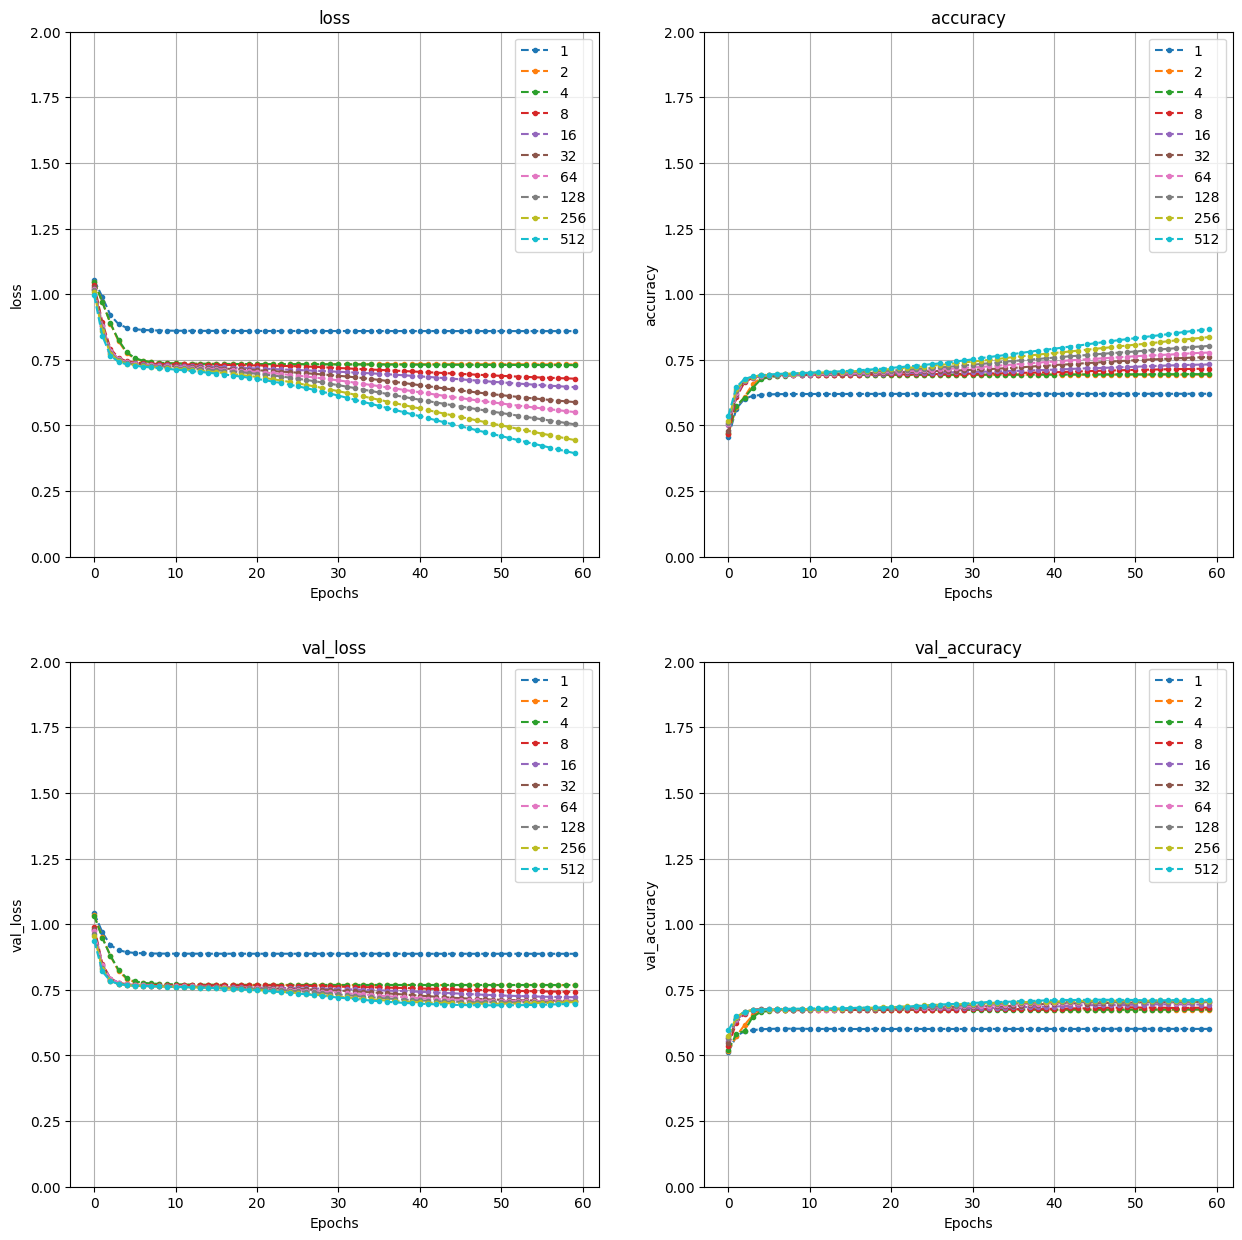

In [60]:
plt.figure(figsize=(15,15))
scores = ["loss", "accuracy", "val_loss", "val_accuracy"]
model_sizes = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
for i, score in enumerate(scores):
    plt.subplot(2,2,i+1)
    plt.ylim(0, 2)
    plt.grid(True)
    for model_size in model_sizes:
        plt.plot(histories[model_size].history[score], label=f"{model_size}", marker=".", linestyle="--")
        plt.xlabel("Epochs")
        plt.ylabel(score)
        plt.title(f"{score}")
    plt.legend(loc="best")
plt.show()

- Assurez-vous que le **nombre d'époques d'entraînement** est suffisant pour **observer une augmentation de la perte de validation**. **Conseil** : Lors du développement du modèle, commencez avec un petit nombre d'époques, comme 5 ou 10. Une fois que le modèle semble bien fonctionner, testez avec des valeurs plus importantes, comme 40 ou 80 époques, ce qui s'est avéré raisonnable dans nos tests. En fonction de vos observations, envisagez de mener des expériences supplémentaires, si nécessaire. Combien d'époques ont finalement été nécessaires ?

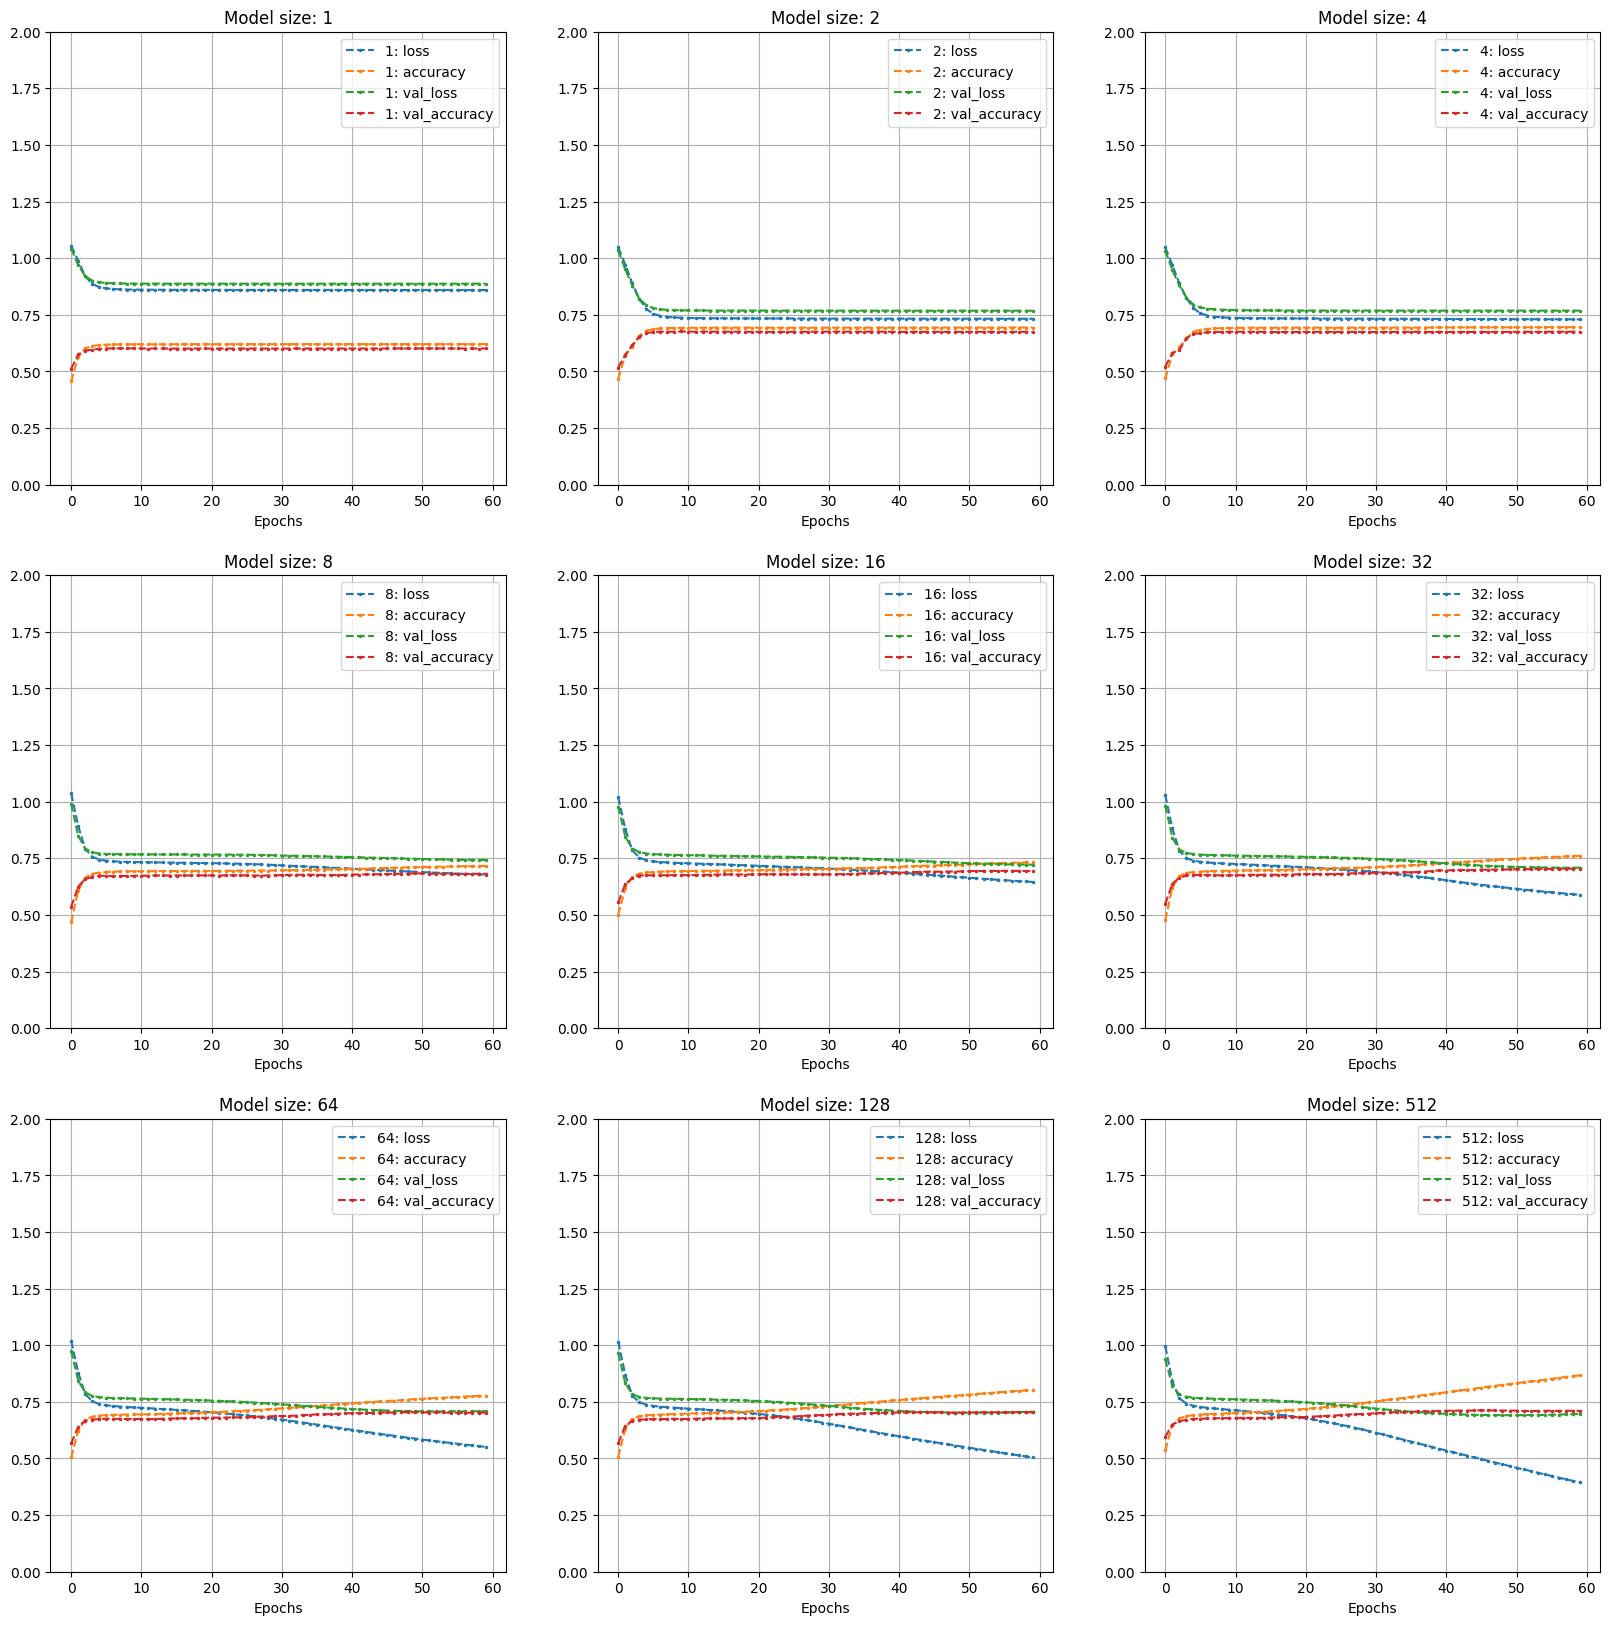

In [59]:
# Code cell
plt.figure(figsize=(20,20))
scores = ["loss", "accuracy", "val_loss", "val_accuracy"]
model_sizes = [1, 2, 4, 8, 16, 32, 64, 128, 512]

for i, model_size in enumerate(model_sizes):
    plt.subplot(3,3,i+1)
    plt.ylim(0, 2)
    plt.grid(True)
    for j, score in enumerate(scores):
        plt.plot(histories[model_size].history[score], label=f"{model_size}: {score}", marker=".", linestyle="--", markersize=3) 
        plt.xlabel("Epochs")
        plt.title(f"Model size: {model_size}")
    plt.legend(loc="best")
plt.show()

> ## OBSERVATIONS FROM VARYING HIDDEN LAYER SIZE
>
> After having plotted the accuracy and loss of each model for both the training and validation data, we can see that the models with a smaller number of nodes in the hidden layer stop improving after a certain number of epochs.   
> For models with higher number of nodes in the hidden layer(16+), the model seems to start performing better on the training data as from epoch 20. However, we also see that the results on the validation data do not reflect this trend and the accuracy and loss worsen remain constant. This indicates that the models are overfitting to the training data. 

- **Variation du nombre de couches**.

    - Réalisez des expériences similaires à celles décrites ci-dessus, mais cette fois en faisant varier le nombre de couches de 1 à 4. Documentez vos résultats.

In [34]:
# Code cell
histories2 = {}
def vary_model_layers(num_layers, pyramid=False, starting_size=32):
    print(f"Creating model with {num_layers} layers. Pyramid: {pyramid}. Starting size: {starting_size}")
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(462,)))
    for i in range(num_layers):
        model.add(tf.keras.layers.Dense(starting_size//2**(i), activation='relu'))
    model.add(tf.keras.layers.Dense(3, activation='softmax'))
    
    model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
    return model

- Combien de nœuds chaque couche devrait-elle contenir ? Testez au moins deux scénarios. Traditionnellement, une stratégie courante consistait à diminuer le nombre de nœuds de la couche d'entrée à la couche de sortie, souvent en divisant par deux, pour créer une structure en pyramide. Cependant, l'expérience récente suggère que le maintien d'un nombre constant de nœuds dans toutes les couches peut également bien fonctionner. Décrivez vos observations. Il est acceptable que les deux stratégies produisent des résultats similaires en termes de performance.

In [35]:
# Code cell

In [55]:
for model_size, hist in histories.items():
    histories2[(1, False, model_size)] = hist

for num_layers in [2, 3]: # we skip num_layers = 1 as we already found results for it 
    for starting_size in [4, 16, 64,]:
        for pyramid in [True, False]:
            model = vary_model_layers(num_layers, pyramid, starting_size)
            history = model.fit(X_train_scaled, y_train, validation_data=(X_valid_scaled, y_valid), epochs=50, verbose=0)
            histories2[(num_layers, pyramid, starting_size)] = history

# num_layers = 4
for starting_size in [8, 32, 128]:
    for pyramid in [True, False]:
        model = vary_model_layers(4, pyramid, starting_size) 
        history = model.fit(X_train_scaled, y_train, validation_data=(X_valid_scaled, y_valid), epochs=50, verbose=0)
        histories2[(4, pyramid, starting_size)] = history

Creating model with 2 layers. Pyramid: True. Starting size: 4
Creating model with 2 layers. Pyramid: False. Starting size: 4
Creating model with 2 layers. Pyramid: True. Starting size: 16
Creating model with 2 layers. Pyramid: False. Starting size: 16
Creating model with 2 layers. Pyramid: True. Starting size: 64
Creating model with 2 layers. Pyramid: False. Starting size: 64
Creating model with 3 layers. Pyramid: True. Starting size: 4
Creating model with 3 layers. Pyramid: False. Starting size: 4
Creating model with 3 layers. Pyramid: True. Starting size: 16
Creating model with 3 layers. Pyramid: False. Starting size: 16
Creating model with 3 layers. Pyramid: True. Starting size: 64
Creating model with 3 layers. Pyramid: False. Starting size: 64
Creating model with 4 layers. Pyramid: True. Starting size: 8
Creating model with 4 layers. Pyramid: False. Starting size: 8
Creating model with 4 layers. Pyramid: True. Starting size: 32
Creating model with 4 layers. Pyramid: False. Starting

<Figure size 1500x1500 with 0 Axes>

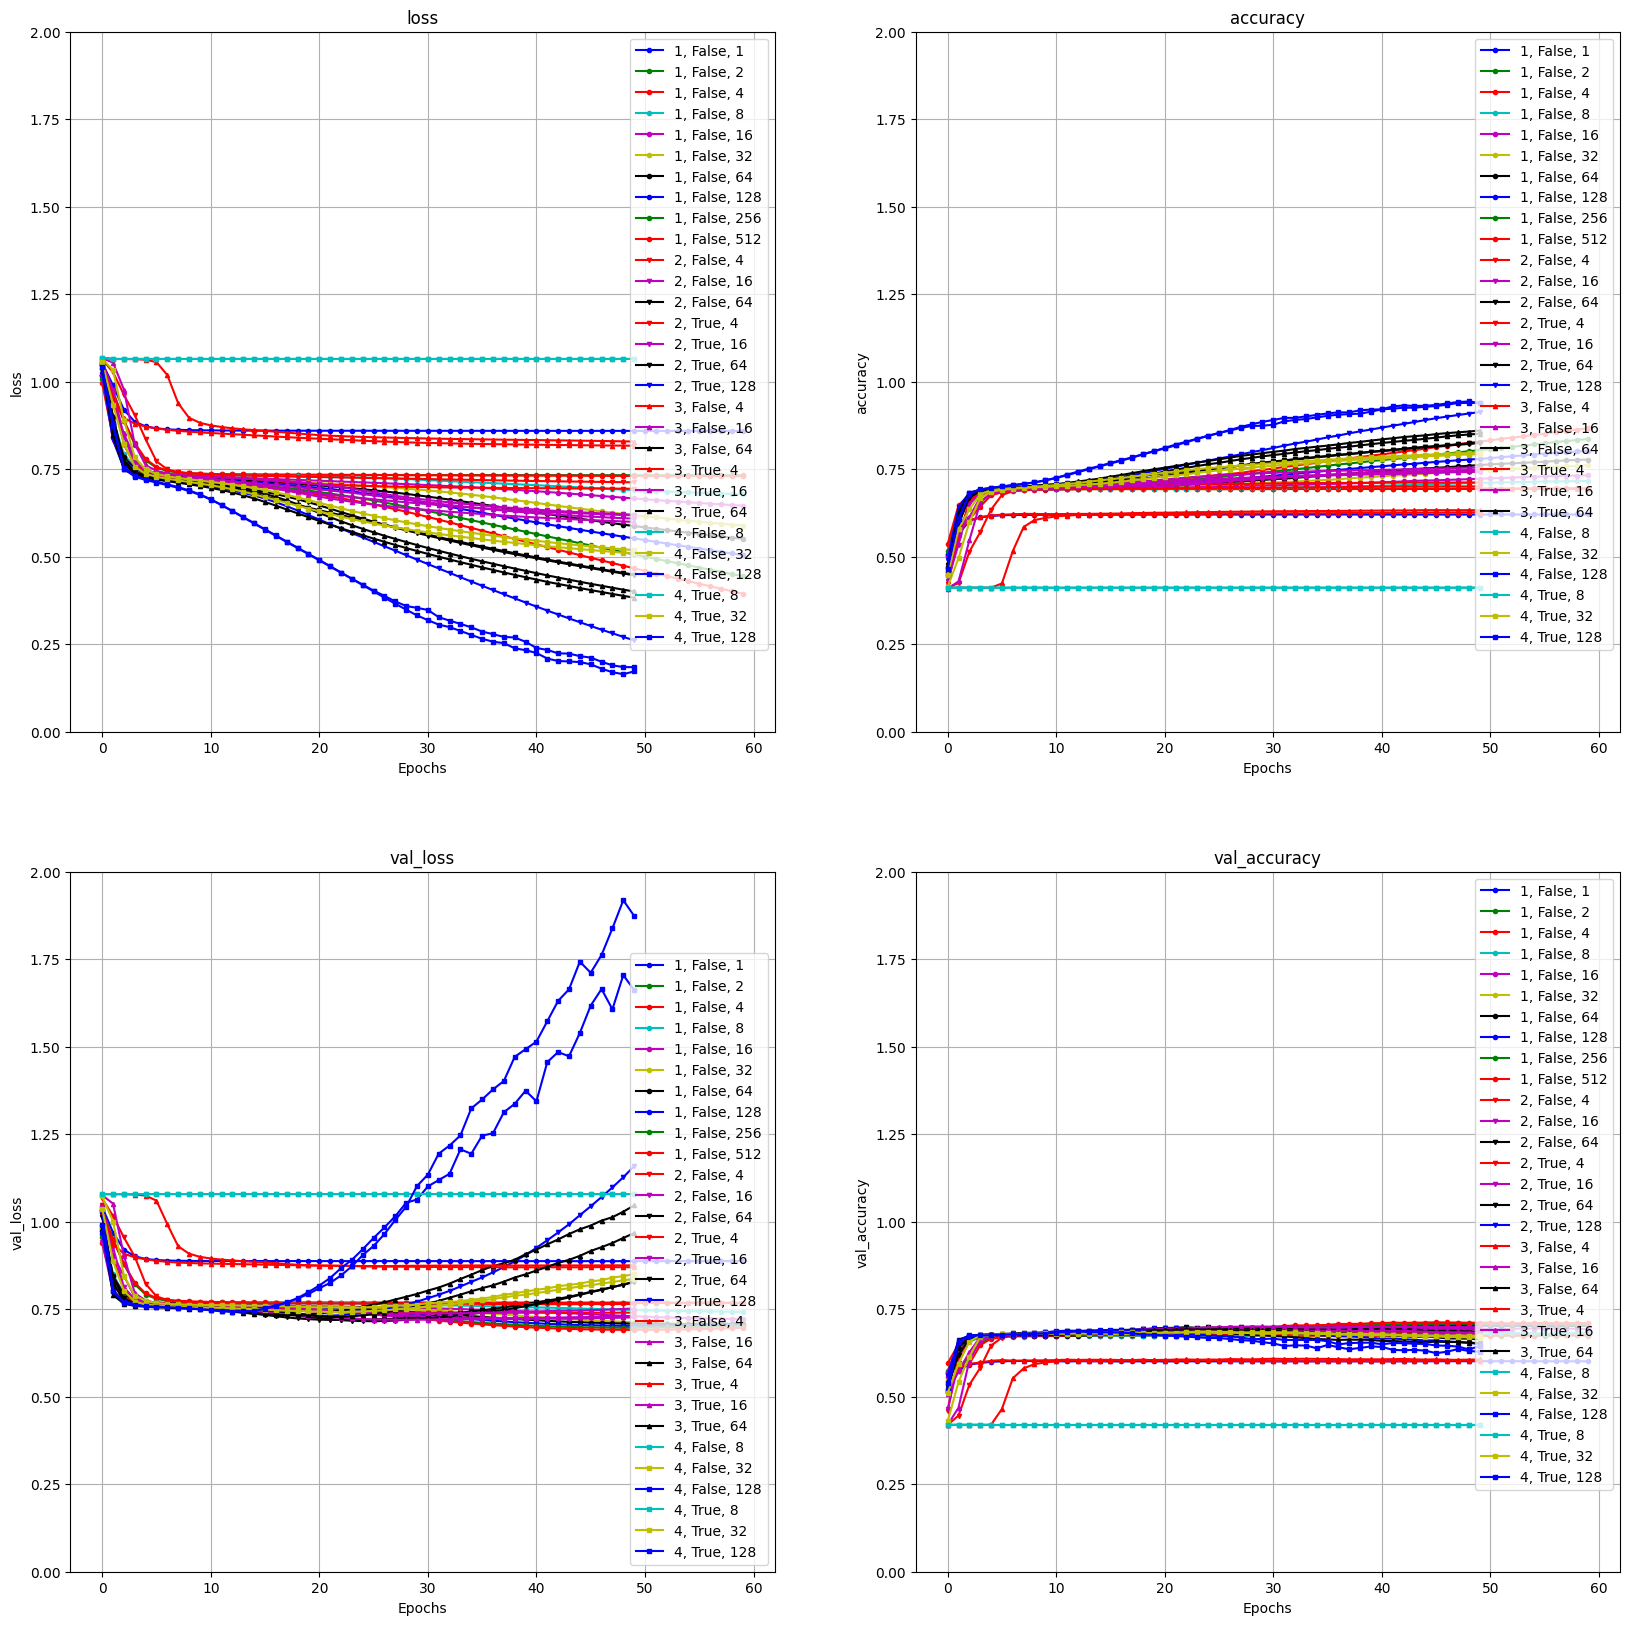

In [77]:
plt.figure(figsize=(15,15))
scores = ["loss", "accuracy", "val_loss", "val_accuracy"]
num_layers = [1, 2, 3, 4]
pyramid = [0, 1]
starting_size = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]

# convert into a dict with the structure num_layers -> starting_size -> pyramid
hist2_dict = {}
for num_layer in num_layers:
    hist2_dict[num_layer] = {}
    for size in starting_size:
        hist2_dict[num_layer][size] = {}
        for pyr in pyramid:
            if (num_layer, pyr, size) in histories2:
                hist2_dict[num_layer][size][pyr] = histories2[(num_layer, pyr, size)]
            
markers = ['o', 'v', '^', 's', 'P', 'D']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k'] 

plt.figure(figsize=(20,20))
for i, score in enumerate(scores):
    plt.subplot(2,2,i+1)
    plt.ylim(0, 2)
    plt.grid(True)
    for num_layer in num_layers:
        for pyr in pyramid:
            for size in starting_size:
                try:
                    curr_hist = hist2_dict[num_layer][size][pyr]
                except KeyError:
                    continue
                
                color = colors[starting_size.index(size) % len(colors)]
                marker = markers[num_layer-1]
                plt.plot(curr_hist.history[score], label=f"{num_layer}, {'True' if pyr else 'False'}, {size}", marker=marker, color=color, markersize=3)
                plt.xlabel("Epochs")
                plt.ylabel(score)
                plt.title(f"{score}")
    plt.legend(loc="best")
plt.show()

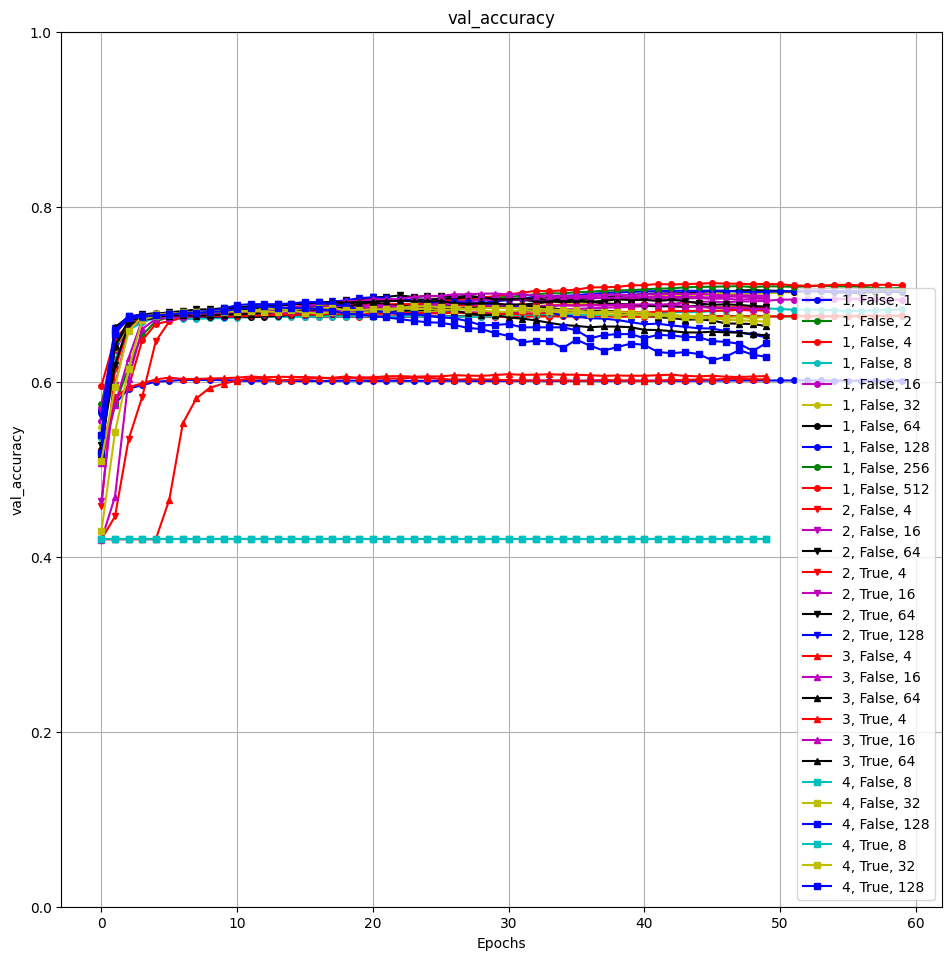

In [78]:
# plot val_accuracy only

plt.figure(figsize=(25,25))
scores = ["val_accuracy"]
for i, score in enumerate(scores):
    plt.subplot(2,2,i+1)
    plt.ylim(0, 1)
    plt.grid(True)
    for num_layer in num_layers:
        for pyr in pyramid:
            for size in starting_size:
                try:
                    curr_hist = hist2_dict[num_layer][size][pyr]
                except KeyError:
                    continue
                
                color = colors[starting_size.index(size) % len(colors)]
                marker = markers[num_layer-1]
                plt.plot(curr_hist.history[score], label=f"{num_layer}, {'True' if pyr else 'False'}, {size}", marker=marker, color=color, markersize=4)
                plt.xlabel("Epochs")
                plt.ylabel(score)
                plt.title(f"{score}")
    plt.legend(loc="best")
plt.show()

> # OBSERVATIONS
>
> Similar to when we tried different hidden layer sizes, we can see that the models seem to plateau at a accuracy of 0.7 on the validation data.    
> However, we can also see clearer signs of overfitting. Taking a look at the most obvious one, the model with 4 layers and 128 nodes as the first layer, we can see that the accuracy on the training data tends to 100% and the loss to 0%. However, the accuracy on the validation data goes down slightly and the loss increases. This is a clear sign of overfitting

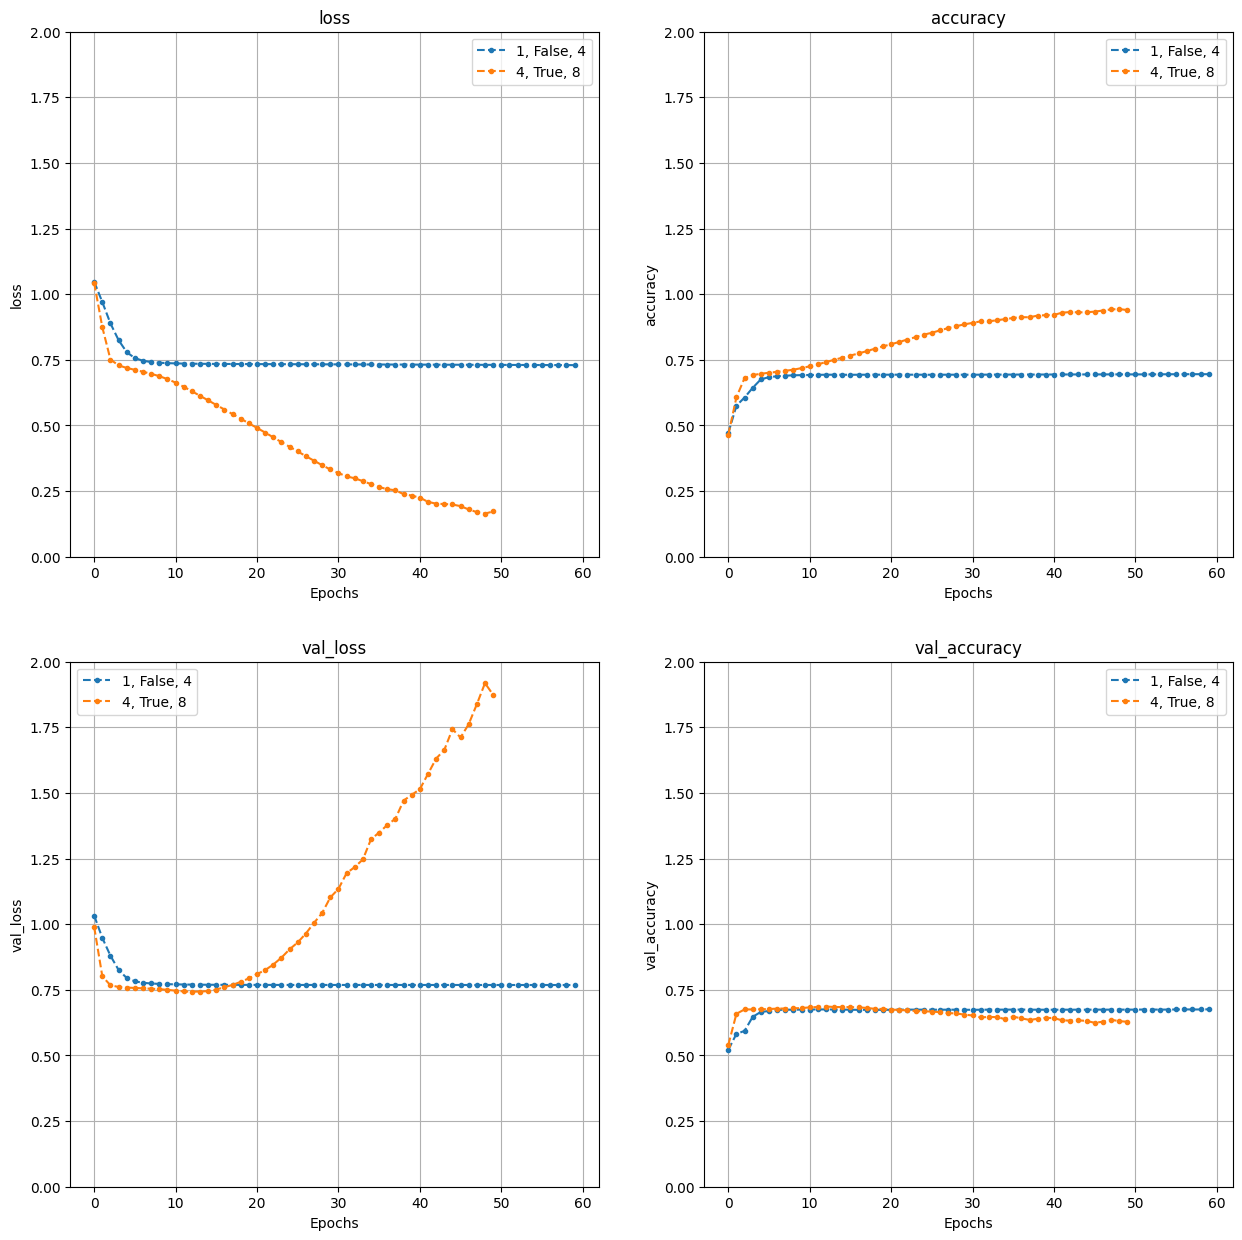

In [80]:
# comparing the overfitting model to one from before (1 layer, 4 nodes, no pyramid)

hist1_4_0 = hist2_dict[1][4][False]
hist4_128_1 = hist2_dict[4][128][True]

plt.figure(figsize=(15,15))
scores = ["loss", "accuracy", "val_loss", "val_accuracy"]
for i, score in enumerate(scores):
    plt.subplot(2,2,i+1)
    plt.ylim(0, 2)
    plt.grid(True)
    plt.plot(hist1_4_0.history[score], label=f"1, False, 4", marker=".", linestyle="--")
    plt.plot(hist4_128_1.history[score], label=f"4, True, 8", marker=".", linestyle="--")
    plt.xlabel("Epochs")
    plt.ylabel(score)
    plt.title(f"{score}")
    plt.legend(loc="best")
plt.show()

- Sélectionnez un de vos modèles qui illustre le surapprentissage. Dans nos expériences, nous avons facilement construit un modèle atteignant près de 100 % de précision sur les données d'entraînement, sans aucune amélioration similaire sur l'ensemble de validation. Présentez ce réseau de neurones avec ses graphiques de précision et de perte. Expliquez pourquoi vous concluez que le modèle surapprend.

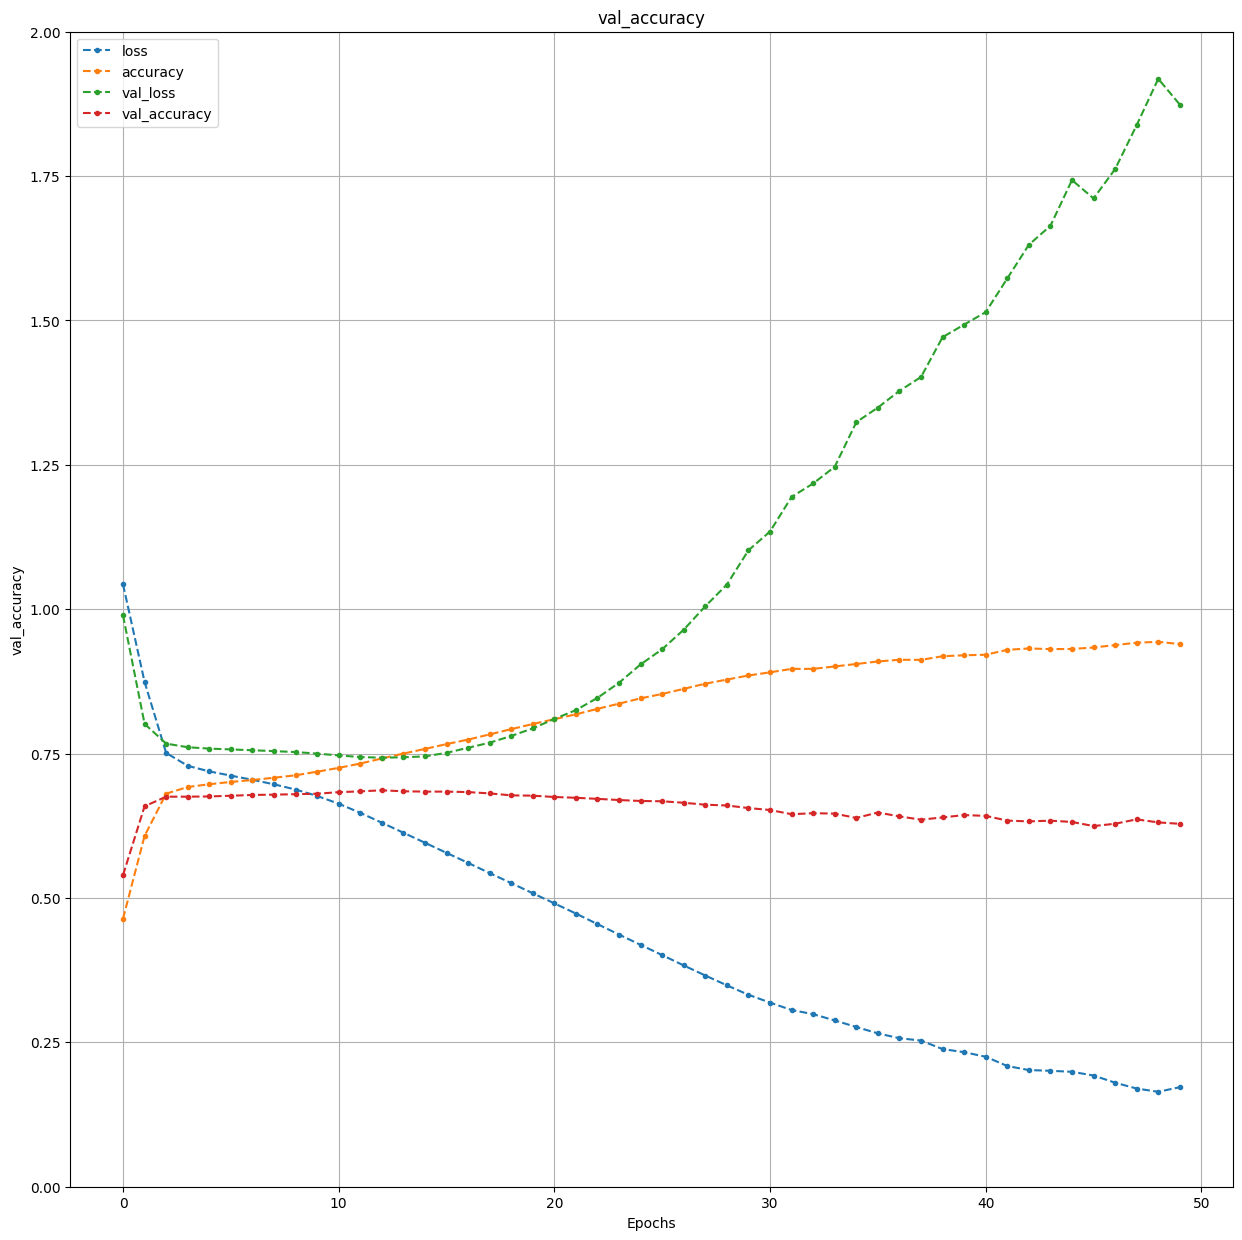

In [82]:
# Code cell
hist4_128_1 = hist2_dict[4][128][True]

plt.figure(figsize=(15,15))
plt.ylim(0, 2)
plt.grid(True)
scores = ["loss", "accuracy", "val_loss", "val_accuracy"]
for i, score in enumerate(scores):
    plt.plot(hist4_128_1.history[score], label=f"{score}", marker=".", linestyle="--")
plt.xlabel("Epochs")
plt.ylabel(score)
plt.title(f"{score}")
plt.legend(loc="best")
plt.show()

> ## ANSWER
> As mentioned before, this model is overfitting because the accuracy on the training data tends to 100% and the loss to 0%. However, the accuracy on the validation data goes down slightly and the loss increases. This is a clear sign of overfitting

- **Fonction d'activation**.

    - Présentez les résultats pour une des configurations mentionnées ci-dessus en variant la fonction d'activation. Testez au moins `relu` (le paramètre par défaut) et `sigmoid`. Le choix du modèle spécifique, y compris le nombre de couches et de nœuds, est à votre discrétion. Documentez vos observations en conséquence.

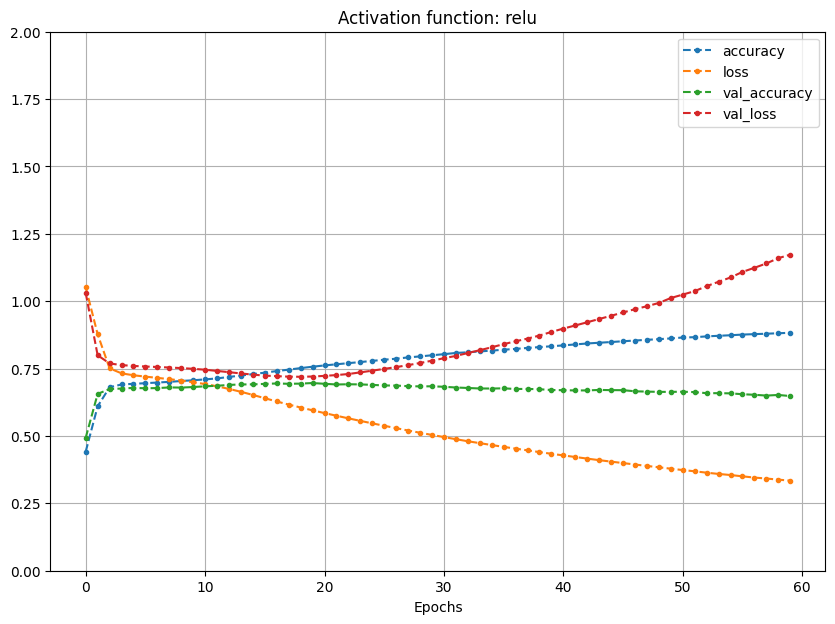

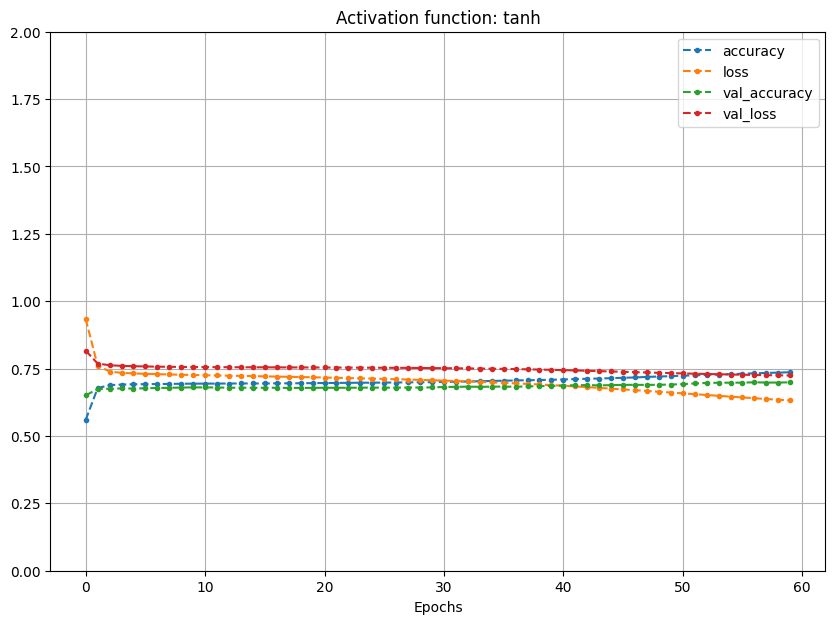

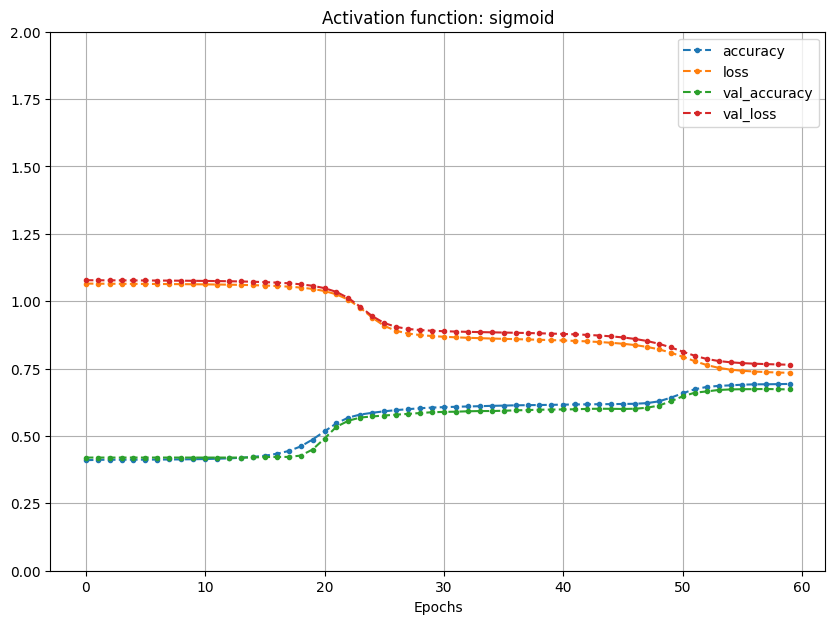

In [98]:
# Code cell
activations = ["relu", "tanh", "sigmoid"]
for activation in activations:
    model = tf.keras.Sequential()
    
    # we choose the model with 3 layers, pyramid, and 64 starting nodes because it seems to be performing well
    model.add(tf.keras.layers.Input(shape=(462,)))
    model.add(tf.keras.layers.Dense(64, activation=activation))
    model.add(tf.keras.layers.Dense(32, activation=activation))
    model.add(tf.keras.layers.Dense(16, activation=activation))
    model.add(tf.keras.layers.Dense(3, activation='softmax'))
    
    model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
    history = model.fit(X_train_scaled, y_train, validation_data=(X_valid_scaled, y_valid), epochs=60, verbose=0)
    
    pd.DataFrame(history.history).plot(
        grid=True, figsize=(10, 7), title="Loss and Accuracy", style="--.", ylim=(0, 2)
    )
    plt.legend(loc="best")
    plt.title(f"Activation function: {activation}")
    plt.xlabel("Epochs")
    plt.show()

> ## FINDINGS
>
> All activation functions show convergence in both training and validation loss, as well as in accuracy over the epochs. However, the rate of convergence and final values differ across activation functions.
>
> ### Relu
> Fast Convergence in Initial Epochs  
> Some Overfitting at higher epochs
>
> ### Tanh
> Smooth Convergence  
> Consistent Performance
>
> ### Sigmoid
> Slow Convergence  
> Higher Loss Values  
> Gap Between Training and Validation
>
> ### Conclusion
> ReLU and tanh appear to be better choices than sigmoid for this model. We choose ReLU as it seems to achieve faster convergence and seems to have slightly better performance

- **Régularisation** dans les réseaux de neurones est une technique utilisée pour éviter le surapprentissage.

    - Une technique consiste à ajouter une pénalité à la fonction de perte pour décourager les modèles excessivement complexes. Appliquez une pénalité `l2` à certaines ou à toutes les couches. Soyez prudent, car des pénalités trop agressives se sont révélées problématiques dans nos expériences. Commencez avec la valeur par défaut `l2` de 0.01, puis réduisez-la à 0.001 et à 1e-4. Sélectionnez un modèle spécifique parmi les expériences ci-dessus et présentez un cas où vous avez réussi à réduire le surapprentissage. Incluez une paire de graphiques comparant les résultats avec et sans régularisation. Expliquez votre raisonnement pour conclure que le surapprentissage a été réduit. N'espérez pas éliminer complètement le surapprentissage. Encore une fois, il s'agit d'un ensemble de données difficile à travailler.

In [100]:
# Code cell
def vary_penalty(penalty_val):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(462,)))
    model.add(tf.keras.layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l2(penalty_val)))
    model.add(tf.keras.layers.Dense(32, kernel_regularizer=tf.keras.regularizers.l2(penalty_val)))
    model.add(tf.keras.layers.Dense(16, kernel_regularizer=tf.keras.regularizers.l2(penalty_val)))
    model.add(tf.keras.layers.Dense(3, activation='softmax'))

    model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
    history = model.fit(X_train_scaled, y_train, validation_data=(X_valid_scaled, y_valid), epochs=50, verbose=0)

    return history

penalty_histories = {}

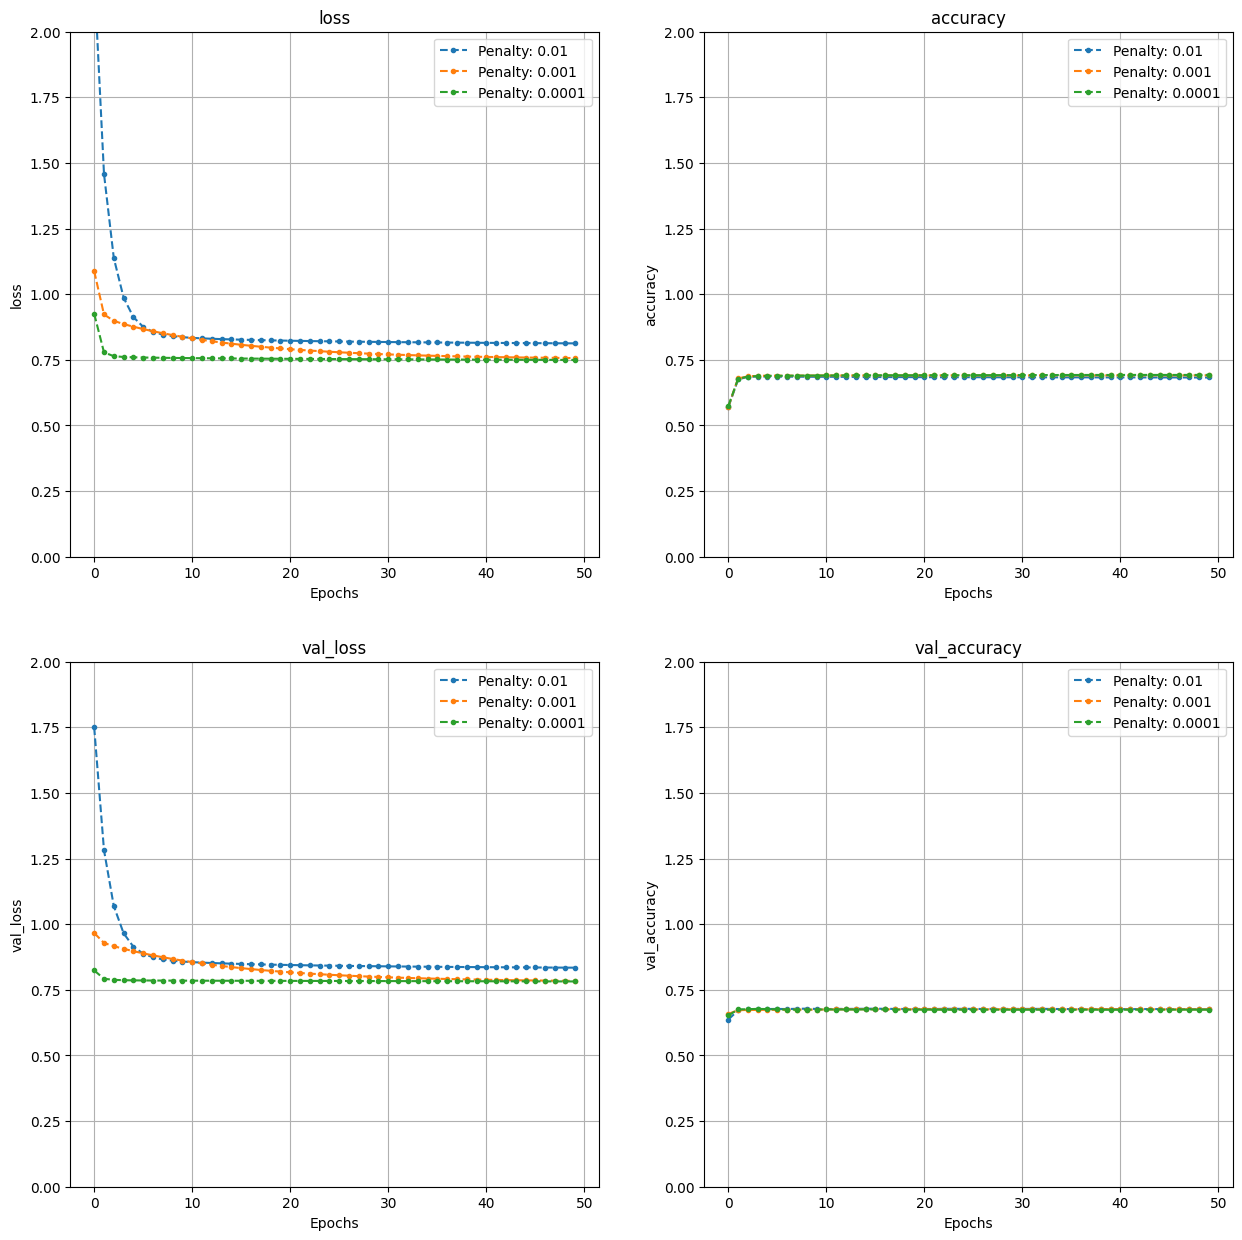

In [101]:
for penalty_val in [0.01, 0.001, 0.0001]:
    history = vary_penalty(penalty_val)
    penalty_histories[penalty_val] = history

plt.figure(figsize=(15,15))
scores = ["loss", "accuracy", "val_loss", "val_accuracy"]
for i, score in enumerate(scores):
    plt.subplot(2,2,i+1)
    plt.ylim(0, 2)
    plt.grid(True)
    for penalty_val in penalty_histories:
        plt.plot(penalty_histories[penalty_val].history[score], label=f"Penalty: {penalty_val}", marker=".", linestyle="--")
    plt.xlabel("Epochs")
    plt.ylabel(score)
    plt.title(f"{score}")
    plt.legend(loc="best")
plt.show()

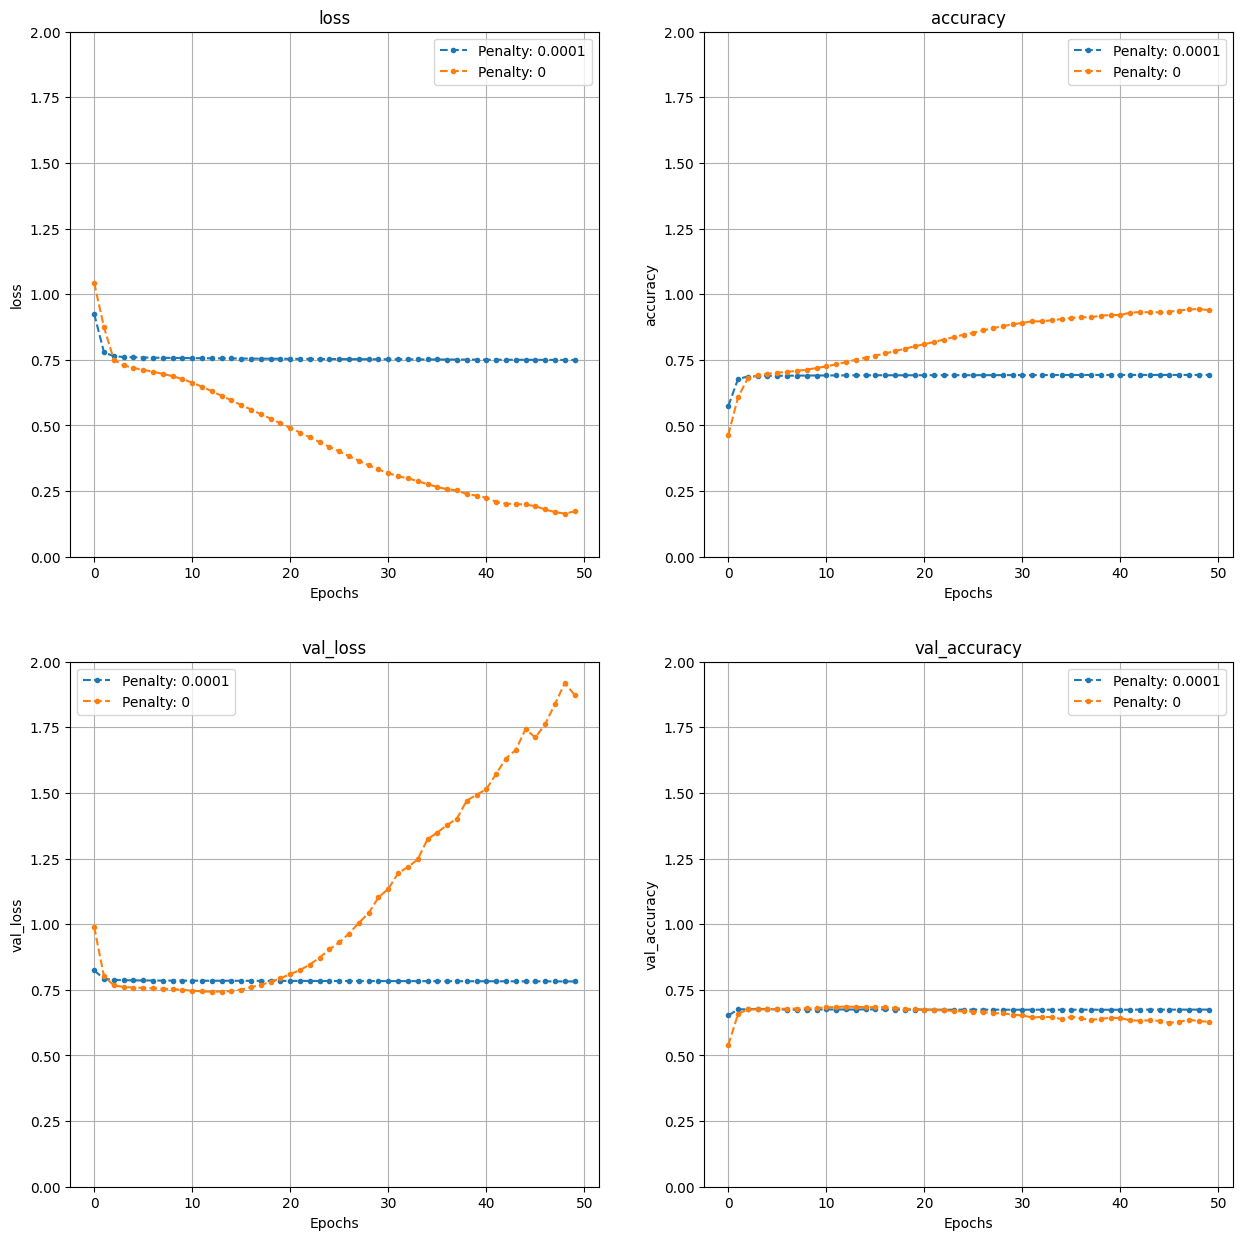

In [102]:
# plot penalty = 0.0001 and no penalty on same graph

plt.figure(figsize=(15,15))
scores = ["loss", "accuracy", "val_loss", "val_accuracy"]
for i, score in enumerate(scores):
    plt.subplot(2,2,i+1)
    plt.ylim(0, 2)
    plt.grid(True)
    plt.plot(penalty_histories[0.0001].history[score], label=f"Penalty: 0.0001", marker=".", linestyle="--")
    plt.plot(hist4_128_1.history[score], label=f"Penalty: 0", marker=".", linestyle="--")
    plt.xlabel("Epochs")
    plt.ylabel(score)
    plt.title(f"{score}")
    plt.legend(loc="best")
plt.show()

> ## FINDINGS
>
> Having a penalty of 0.001 gices the best values among the penalty values we tested(0.01, 0.001, 0.0001). It also stops the model from overfitting at higher epochs.

- Les couches de **dropout** sont une technique de régularisation dans les réseaux de neurones, où un sous-ensemble aléatoire de neurones est temporairement retiré pendant l'entraînement. Cela aide à éviter le surapprentissage en favorisant la redondance et en améliorant la capacité du réseau à généraliser sur de nouvelles données. Sélectionnez un modèle spécifique parmi les expériences ci-dessus, où vous avez plusieurs couches, et expérimentez l'ajout d'une ou de plusieurs couches de dropout dans votre réseau. Testez deux taux différents, par exemple 0.25 et 0.5. Documentez vos observations.

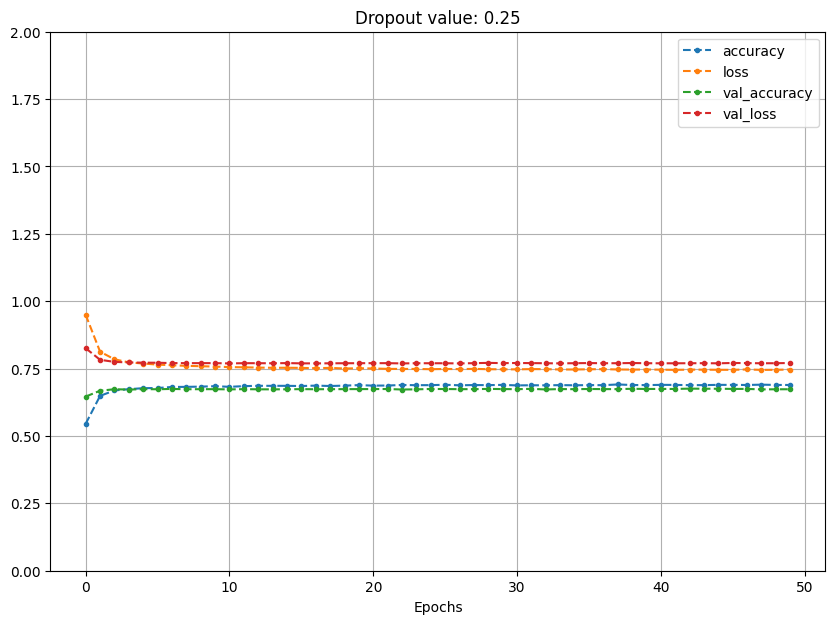

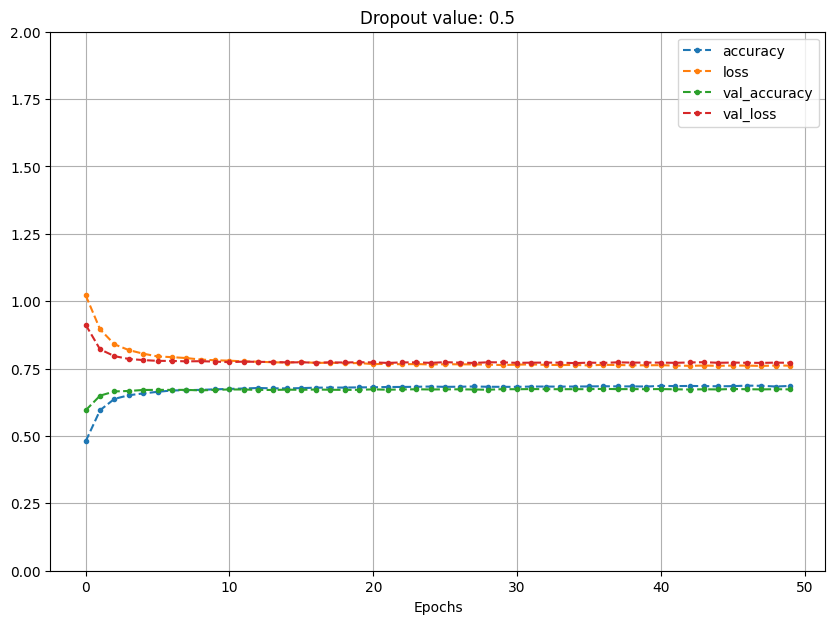

In [106]:
# Code cell
def vary_dropout(dropout_val):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(462,)))
    model.add(tf.keras.layers.Dense(64))
    model.add(tf.keras.layers.Dropout(dropout_val))
    model.add(tf.keras.layers.Dense(32))
    model.add(tf.keras.layers.Dropout(dropout_val))
    model.add(tf.keras.layers.Dense(16))
    model.add(tf.keras.layers.Dense(3, activation='softmax'))

    model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
    history = model.fit(X_train_scaled, y_train, validation_data=(X_valid_scaled, y_valid), epochs=50, verbose=0)

    return history

dropout_histories = {}
for dropout_val in [0.25, 0.5]:
    history = vary_dropout(dropout_val)
    dropout_histories[dropout_val] = history
    pd.DataFrame(history.history).plot(
        grid=True, figsize=(10, 7), title="Loss and Accuracy", style="--.", ylim=(0, 2)
    )
    plt.legend(loc="best")
    plt.title(f"Dropout value: {dropout_val}")
    plt.xlabel("Epochs")
    plt.show()

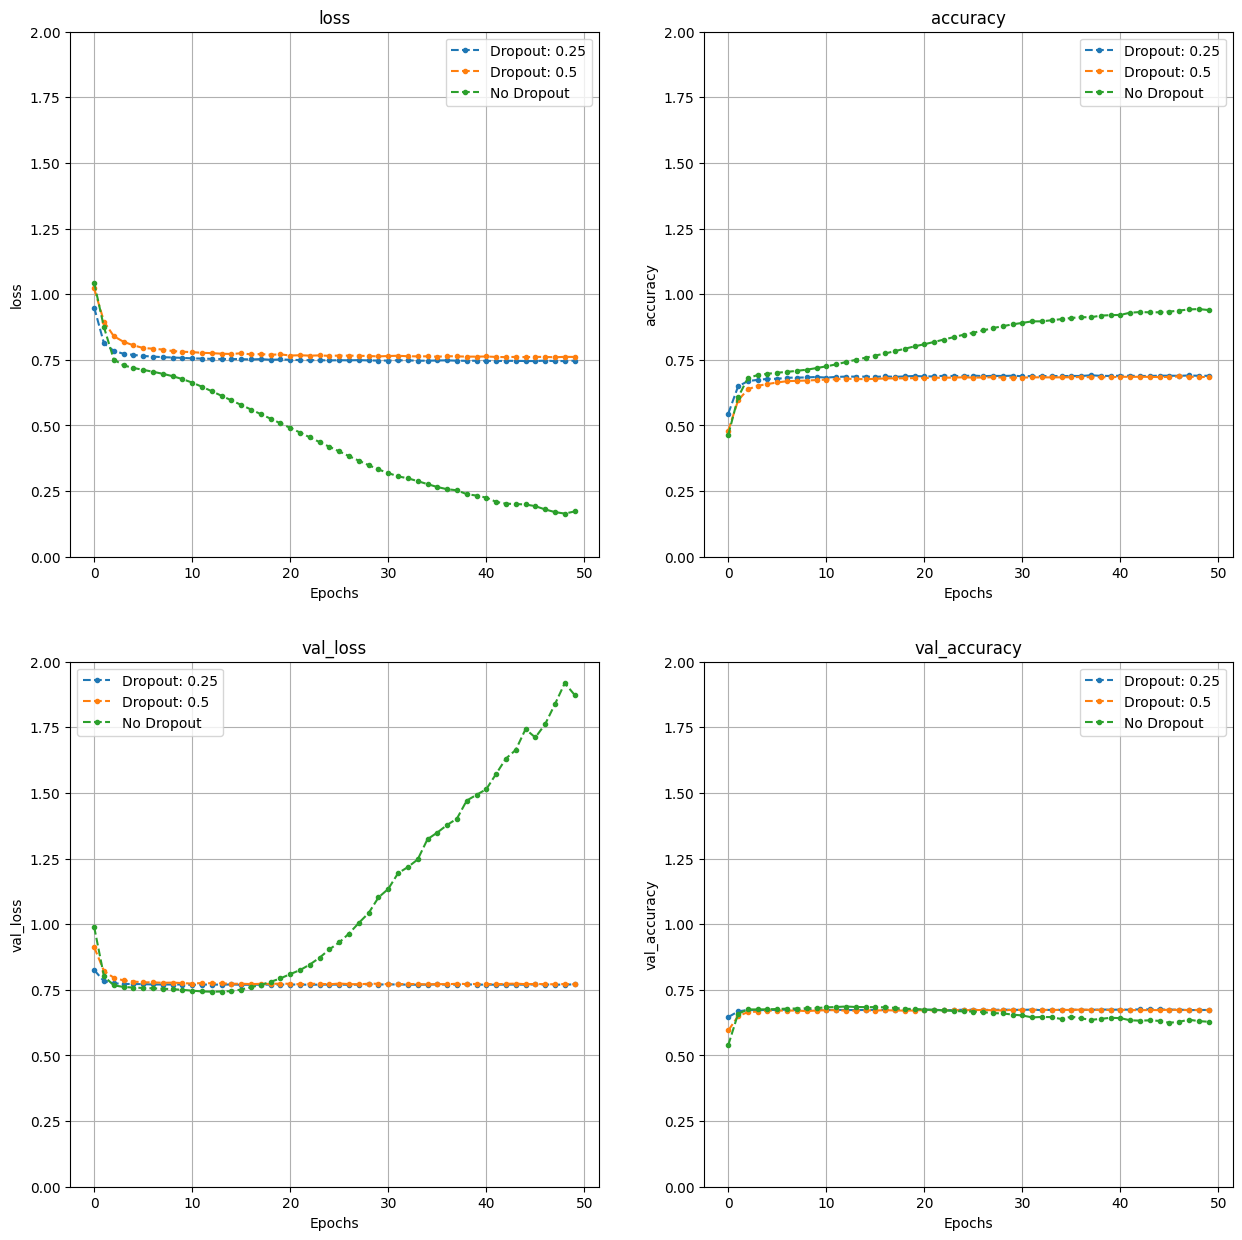

In [113]:
plt.figure(figsize=(15,15))
scores = ["loss", "accuracy", "val_loss", "val_accuracy"]
for i, score in enumerate(scores):
    plt.subplot(2,2,i+1)
    plt.ylim(0, 2)
    plt.grid(True)
    for dropout_val in dropout_histories:
        plt.plot(dropout_histories[dropout_val].history[score], label=f"Dropout: {dropout_val}", marker=".", linestyle="--")
    plt.plot(hist4_128_1.history[score], label=f"No Dropout", marker=".", linestyle="--")
    plt.xlabel("Epochs")
    plt.ylabel(score)
    plt.title(f"{score}")
    plt.legend(loc="best")
plt.show()

> ## FINDINGS
>
> Having dropout layers indeed makes the model less prone to overfitting. We choose a dropout value of 0.25 because it seems to be performing well.

- Résumez vos expériences en utilisant une représentation graphique telle que la Figure 6.15 [sur cette page](https://egallic.fr/Enseignement/ML/ECB/book/deep-learning.html).

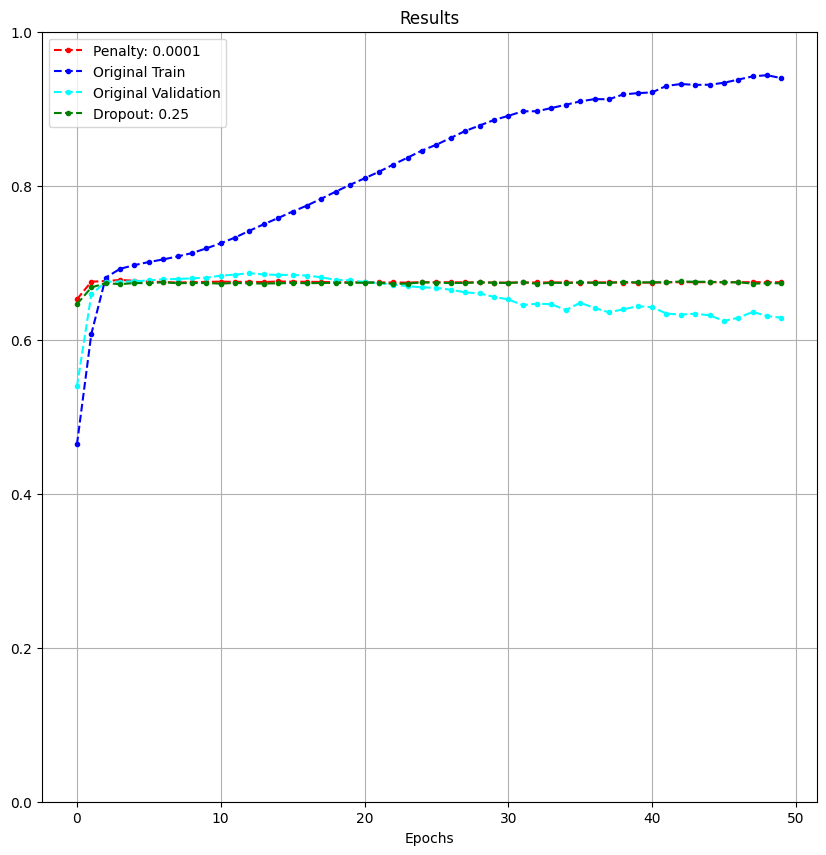

In [124]:
# Code cell

# plot accuracy for original model, l2 penalty = 0.0001, dropout = ## on the same graph

plt.figure(figsize=(10,10))
plt.ylim(0, 1)
plt.grid(True)
plt.plot(penalty_histories[0.0001].history["val_accuracy"], label=f"Penalty: 0.0001", color="red", marker=".", linestyle="--")
plt.plot(hist4_128_1.history["accuracy"], label=f"Original Train", color="blue", marker=".", linestyle="--")
plt.plot(hist4_128_1.history["val_accuracy"], label=f"Original Validation", color="cyan", marker=".", linestyle="--")
plt.plot(dropout_histories[0.25].history["val_accuracy"], label=f"Dropout: 0.25", color="green", marker=".", linestyle="--")
plt.xlabel("Epochs")
plt.title(f"Results")
plt.legend(loc="best")
plt.show() 

- L'**arrêt anticipé** est une technique de régularisation lors de l'entraînement d'un réseau de neurones, où le processus est interrompu lorsque les performances sur l'ensemble de validation commencent à se dégrader, ce qui empêche le réseau d'apprendre le bruit dans les données d'entraînement. Parmi toutes les expériences menées jusqu'à présent, choisissez **une** configuration (le nombre de couches, le nombre de nœuds, la fonction d'activation, la pénalité L2 et les couches de dropout) qui a donné les meilleures performances. Utilisez un graphique de perte et de précision pour déterminer le nombre optimal d'itérations d'entraînement pour ce réseau. Quel est le nombre optimal d'époques pour cette configuration de réseau et pourquoi ?

Text(0.5, 0, 'Epochs')

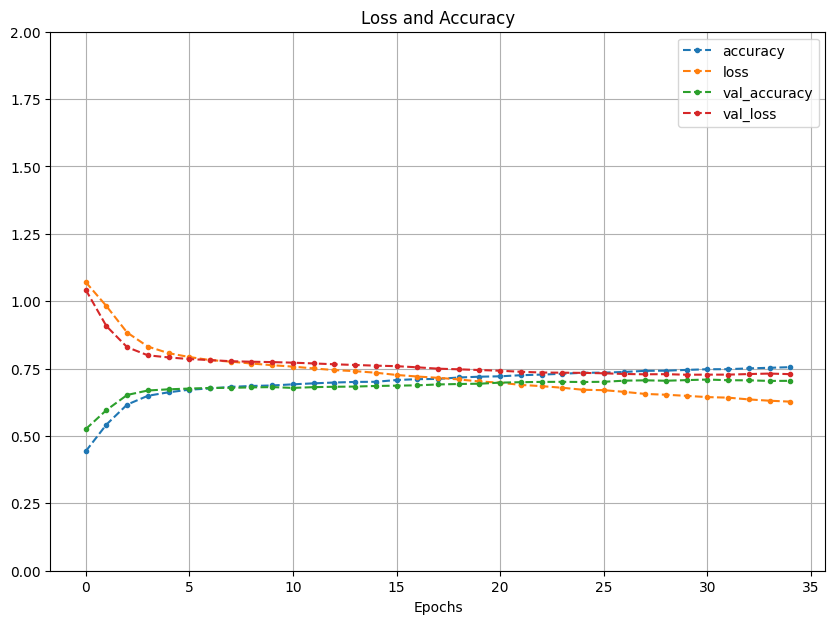

In [123]:
# Code cell

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
model_early_stop = tf.keras.Sequential()
model_early_stop.add(tf.keras.layers.Input(shape=(462,)))
model_early_stop.add(tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.0001)))
model_early_stop.add(tf.keras.layers.Dropout(0.25))
model_early_stop.add(tf.keras.layers.Dense(32, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.0001)))
model_early_stop.add(tf.keras.layers.Dropout(0.25))
model_early_stop.add(tf.keras.layers.Dense(16, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.0001)))
model_early_stop.add(tf.keras.layers.Dense(3, activation='softmax'))

model_early_stop.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = model_early_stop.fit(X_train_scaled, y_train, validation_data=(X_valid_scaled, y_valid), epochs=50, callbacks=[early_stop], verbose=0)

pd.DataFrame(history.history).plot(
    grid=True, figsize=(10, 7), title="Loss and Accuracy", style="--.", ylim=(0, 2)
)
plt.legend(loc="best")
plt.xlabel("Epochs")

In [126]:
print(f"Max validation accuracy: {max(history.history['val_accuracy'])}")
print(f"Reached at epoch: {history.history['val_accuracy'].index(max(history.history['val_accuracy']))}")

Max validation accuracy: 0.7094074487686157
Reached at epoch: 30


### Test

9. **Comparaison des modèles** :

    - Évaluez le modèle de référence sur l'ensemble de test, en utilisant l'ensemble de paramètres optimal identifié lors de la recherche de grille. Appliquez également la meilleure configuration de réseau de neurones à l'ensemble de test.

    - Quantifiez les performances du modèle de référence (meilleure configuration d'hyperparamètres) et de votre réseau de neurones (meilleure configuration) en utilisant des métriques telles que la précision, le rappel et le score F1. Comment ces deux modèles se comparent-ils au modèle de base ?

    - Fournissez des recommandations sur le(s) modèle(s) à choisir pour cette tâche et justifiez vos choix en fonction des résultats de l'analyse.

In [37]:
# Code cell

lr_model = LogisticRegression()


# Resources

- [python - Shuffle DataFrame rows - Stack Overflow](https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows)
- [TensorFlow 2 Tutorial: Get Started in Deep Learning with tf.keras - MachineLearningMastery.com](https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/)
- [A Quick Overview of TensorFlow Basics in 10 Minutes | Geek Culture](https://medium.com/geekculture/a-quick-overview-of-tensorflow-basics-in-10-minutes-69dfedb29eb5)
- [8.3. Parallelism, resource management, and configuration — scikit-learn 1.5.2 documentation](https://scikit-learn.org/stable/computing/parallelism.html)
- [How to Choose an Activation Function for Deep Learning - MachineLearningMastery.com](https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/)
- [Dropout Regularization in Deep Learning Models with Keras - MachineLearningMastery.com](https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/)
- [Use Early Stopping to Halt the Training of Neural Networks At the Right Time - MachineLearningMastery.com](https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/)
- [Comparative Study on Classic Machine learning Algorithms | by Danny Varghese | Towards Data Science](https://towardsdatascience.com/comparative-study-on-classic-machine-learning-algorithms-24f9ff6ab222)